# Test the hologram performances with HD111980 data 09 jun 2017
==================================================================================================

- author : Sylvie Dagoret-Campagne
- date   : October 2nd th 2017
- update : October 11th 2017


The goal of this notebook is to find the parameters that optimize the1-D spectrum for the 2-D image of the disperse
spectrum.
In particular the width around the dispersion axis is very important. This width may bias the computation of equavalent width.
Moreover, we check in this notebook that the wavelength calibration make sense, ie, the position of the order 0 central star in the original image is correct, allowing wavelength calibration





#### problem because limitation in output of data

- firt I tried to generate a config file for jupyter

If you ran jupyter notebook --generate-config to create it, it should be in the correct place already. If not, try putting it at ~/.jupyter/jupyter_notebook_config.py

- and I set : 
> c.NotebookApp.iopub_data_rate_limit = 1000000

but it failed again so I launch jupyter as follow:

> jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000 Ana2DShapeSpectra.ipynb

So it behaves better

In [3]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "theNotebook = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

print theNotebook
from IPython.display import Image, display
import sys
sys.path.append("../../common_tools/")
from common_notebook import *

init_notebook()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Ana2DShapeSpectra
ccdproc version 1.2.0
bottleneck version 1.2.1
/Users/dagoret/MacOSX/GitHub/LSST/CTIOAnaJun2017/ana_09jun17/HD111980


In [5]:
from astropy.modeling import models, fitting

In [6]:
import pandas as pd

# Input directory

In [7]:
inputdir="./rotated_fitsimages"
MIN_IMGNUMBER=4
MAX_IMGNUMBER=28
date="20170609"
object_name='HD111980'
tag = "rotimg"
SelectTagRe='^%s_%s_([0-9]+).fits$' % (tag,date) # regular expression to select the file
SearchTagRe='^%s_%s_[0-9]+.fits$' % (tag,date)
NBIMGPERROW=2

# Output directory

In [8]:
dir_top_images="images_notebooks/"+theNotebook ### Top directory to save images
ensure_dir(dir_top_images) # create that directory

outputdir="./spectrum_fitsspec"
ensure_dir(outputdir)

# Open files
===================================

## order 0 position in original image

In [9]:
df=pd.read_csv('xy_pointing.csv')
x_star=df["x_pointing"]
y_star=df["y_pointing"]
all_theta=df["theta"]
x_pointing=x_star
y_pointing=y_star

In [10]:
order0_positions = np.array([x_pointing,y_pointing]).T

In [11]:
df.head()

Unnamed: 0     theta   x_pointing  y_pointing
0           0 -0.511132   335.448097  343.053556
1           1 -0.339621  1007.084739  341.484256
2           2 -0.111469  1342.833047  341.122682
3           3 -0.312795   686.097705  676.418313
4           4 -0.165841  1342.206613  675.905141

## order 0 position in rotated and cut image

In [12]:
df2=pd.read_csv('x_y_guess2.csv')
x_star2=df2["x_guess2"]
y_star2=df2["y_guess2"]
order0_positions2 = np.array([x_star2,y_star2]).T

In [13]:
df2.head()

Unnamed: 0     theta     x_guess2    y_guess2
0           0 -0.511132   337.007714  202.901692
1           1 -0.339621  1008.079889  206.362541
2           2 -0.111469  1343.318721  202.724330
3           3 -0.312795   687.103584  204.049201
4           4 -0.165841  1342.702111  204.796056

## Input image files

- rotated and cut images

In [14]:
sorted_numbers,sorted_files = MakeFileList([inputdir],MIN_IMGNUMBER,MAX_IMGNUMBER,SelectTagRe,SearchTagRe) 
all_dates,all_airmass,all_images,all_titles,all_header,all_expo,all_filt,all_filt1,all_filt2=BuildImages(sorted_files,sorted_numbers,object_name)

print 'Number of images:',len(all_images)
print all_images[0].shape

Number of images: 11
(400, 2048)


In [15]:
print all_filt

['FGB37 Ron400', 'FGB37 Ron400', 'FGB37 Ron400', 'FGB37 Ron400', 'FGB37 Ron400', 'FGB37 Ron400', 'FGB37 Ron400', 'FGB37 Ron400', 'FGB37 Ron400', 'FGB37 Ron400', 'FGB37 Ron400']


## Check calib info on holograms and disperser

In [16]:
all_grat = []
all_holo = []
for f in all_filt :
    #all_grat.append(f.replace('RG715 ',''))
    #all_grat.append(f.replace('dia ',''))
    disp=get_disperser_filtname(f)
    all_grat.append(disp)
for index,g in enumerate(all_grat):
    holo = Hologram(g,verbose=False)
    #all_holo.append[holo]
    print 'holo_name=',g,'holo_theta=',holo.theta(order0_positions[index]),' rot_theta',all_theta[index],'order0_positions', order0_positions[index]

holo_name= Ron400 holo_theta= -0.277  rot_theta -0.511131904204 order0_positions [ 335.44809668  343.05355629]
holo_name= Ron400 holo_theta= -0.277  rot_theta -0.339621401674 order0_positions [ 1007.08473852   341.48425631]
holo_name= Ron400 holo_theta= -0.277  rot_theta -0.111468540249 order0_positions [ 1342.83304709   341.12268238]
holo_name= Ron400 holo_theta= -0.277  rot_theta -0.312794588419 order0_positions [ 686.09770501  676.41831267]
holo_name= Ron400 holo_theta= -0.277  rot_theta -0.165841298403 order0_positions [ 1342.20661316   675.90514058]
holo_name= Ron400 holo_theta= -0.277  rot_theta -0.366071332905 order0_positions [  332.28988879  1349.37584122]
holo_name= Ron400 holo_theta= -0.277  rot_theta -0.117827299846 order0_positions [ 1677.36694889  1347.69948129]
holo_name= Ron400 holo_theta= -0.277  rot_theta -0.387442055027 order0_positions [  329.97062138  1684.45156907]
holo_name= Ron400 holo_theta= -0.277  rot_theta -0.278534204979 order0_positions [  668.25232379  16

## Show filters and dispersers

In [17]:
Filt_names

['dia Ron400',
 'dia Thor300',
 'dia HoloPhP',
 'dia HoloPhAg',
 'dia HoloAmAg',
 'dia Ron200',
 'Unknown']

In [18]:
filt0_idx,filt1_idx,filt2_idx,filt3_idx,filt4_idx,filt5_idx,filt6_idx=get_filt_idx(all_filt)

In [19]:
print  Filt_names[0],' \t : filt0_idx :: ',filt0_idx
print  Filt_names[1],' \t : filt1_idx :: ',filt1_idx
print  Filt_names[2],' \t : filt2_idx :: ',filt2_idx
print  Filt_names[3],' \t : filt3_idx :: ',filt3_idx
print  Filt_names[4],' \t : filt4_idx :: ',filt4_idx
print  Filt_names[5],' \t : filt5_idx :: ',filt5_idx
print  Filt_names[6],' \t : filt6_idx :: ',filt6_idx

dia Ron400  	 : filt0_idx ::  [ 0  1  2  3  4  5  6  7  8  9 10]
dia Thor300  	 : filt1_idx ::  []
dia HoloPhP  	 : filt2_idx ::  []
dia HoloPhAg  	 : filt3_idx ::  []
dia HoloAmAg  	 : filt4_idx ::  []
dia Ron200  	 : filt5_idx ::  []
Unknown  	 : filt6_idx ::  []


# Input images


Notice, we expect the spectrum is centered in vertical.
The central star is at the origin in the raw image

## Full rotated image

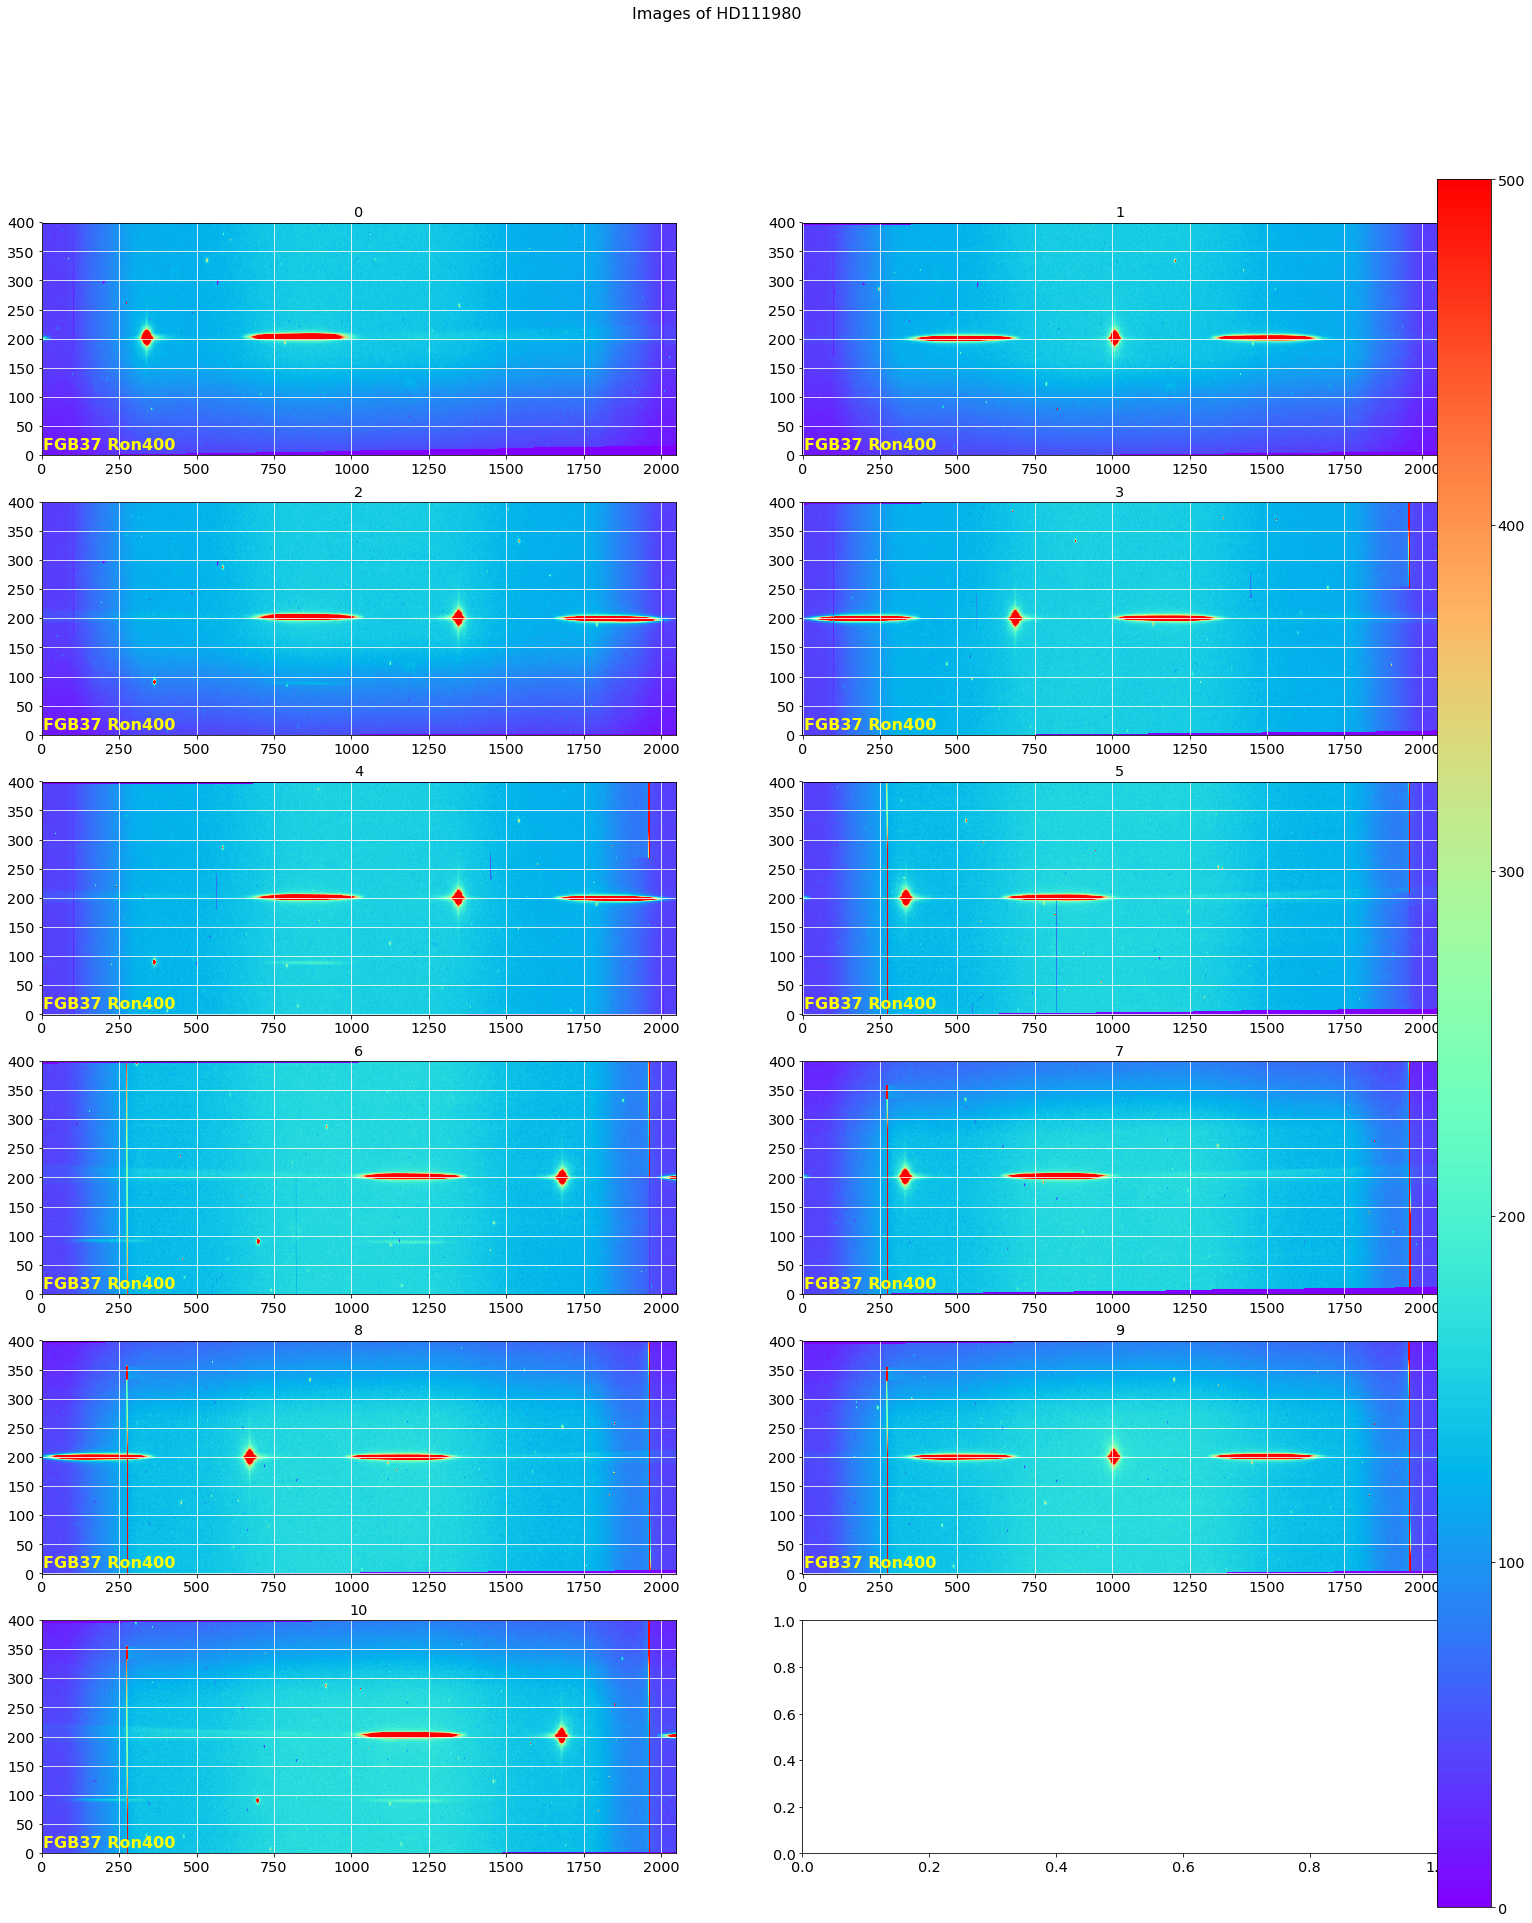

In [20]:
ShowImages(all_images,all_titles,all_filt,object_name,NBIMGPERROW=2,vmin=0,vmax=500)

/Users/dagoret/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


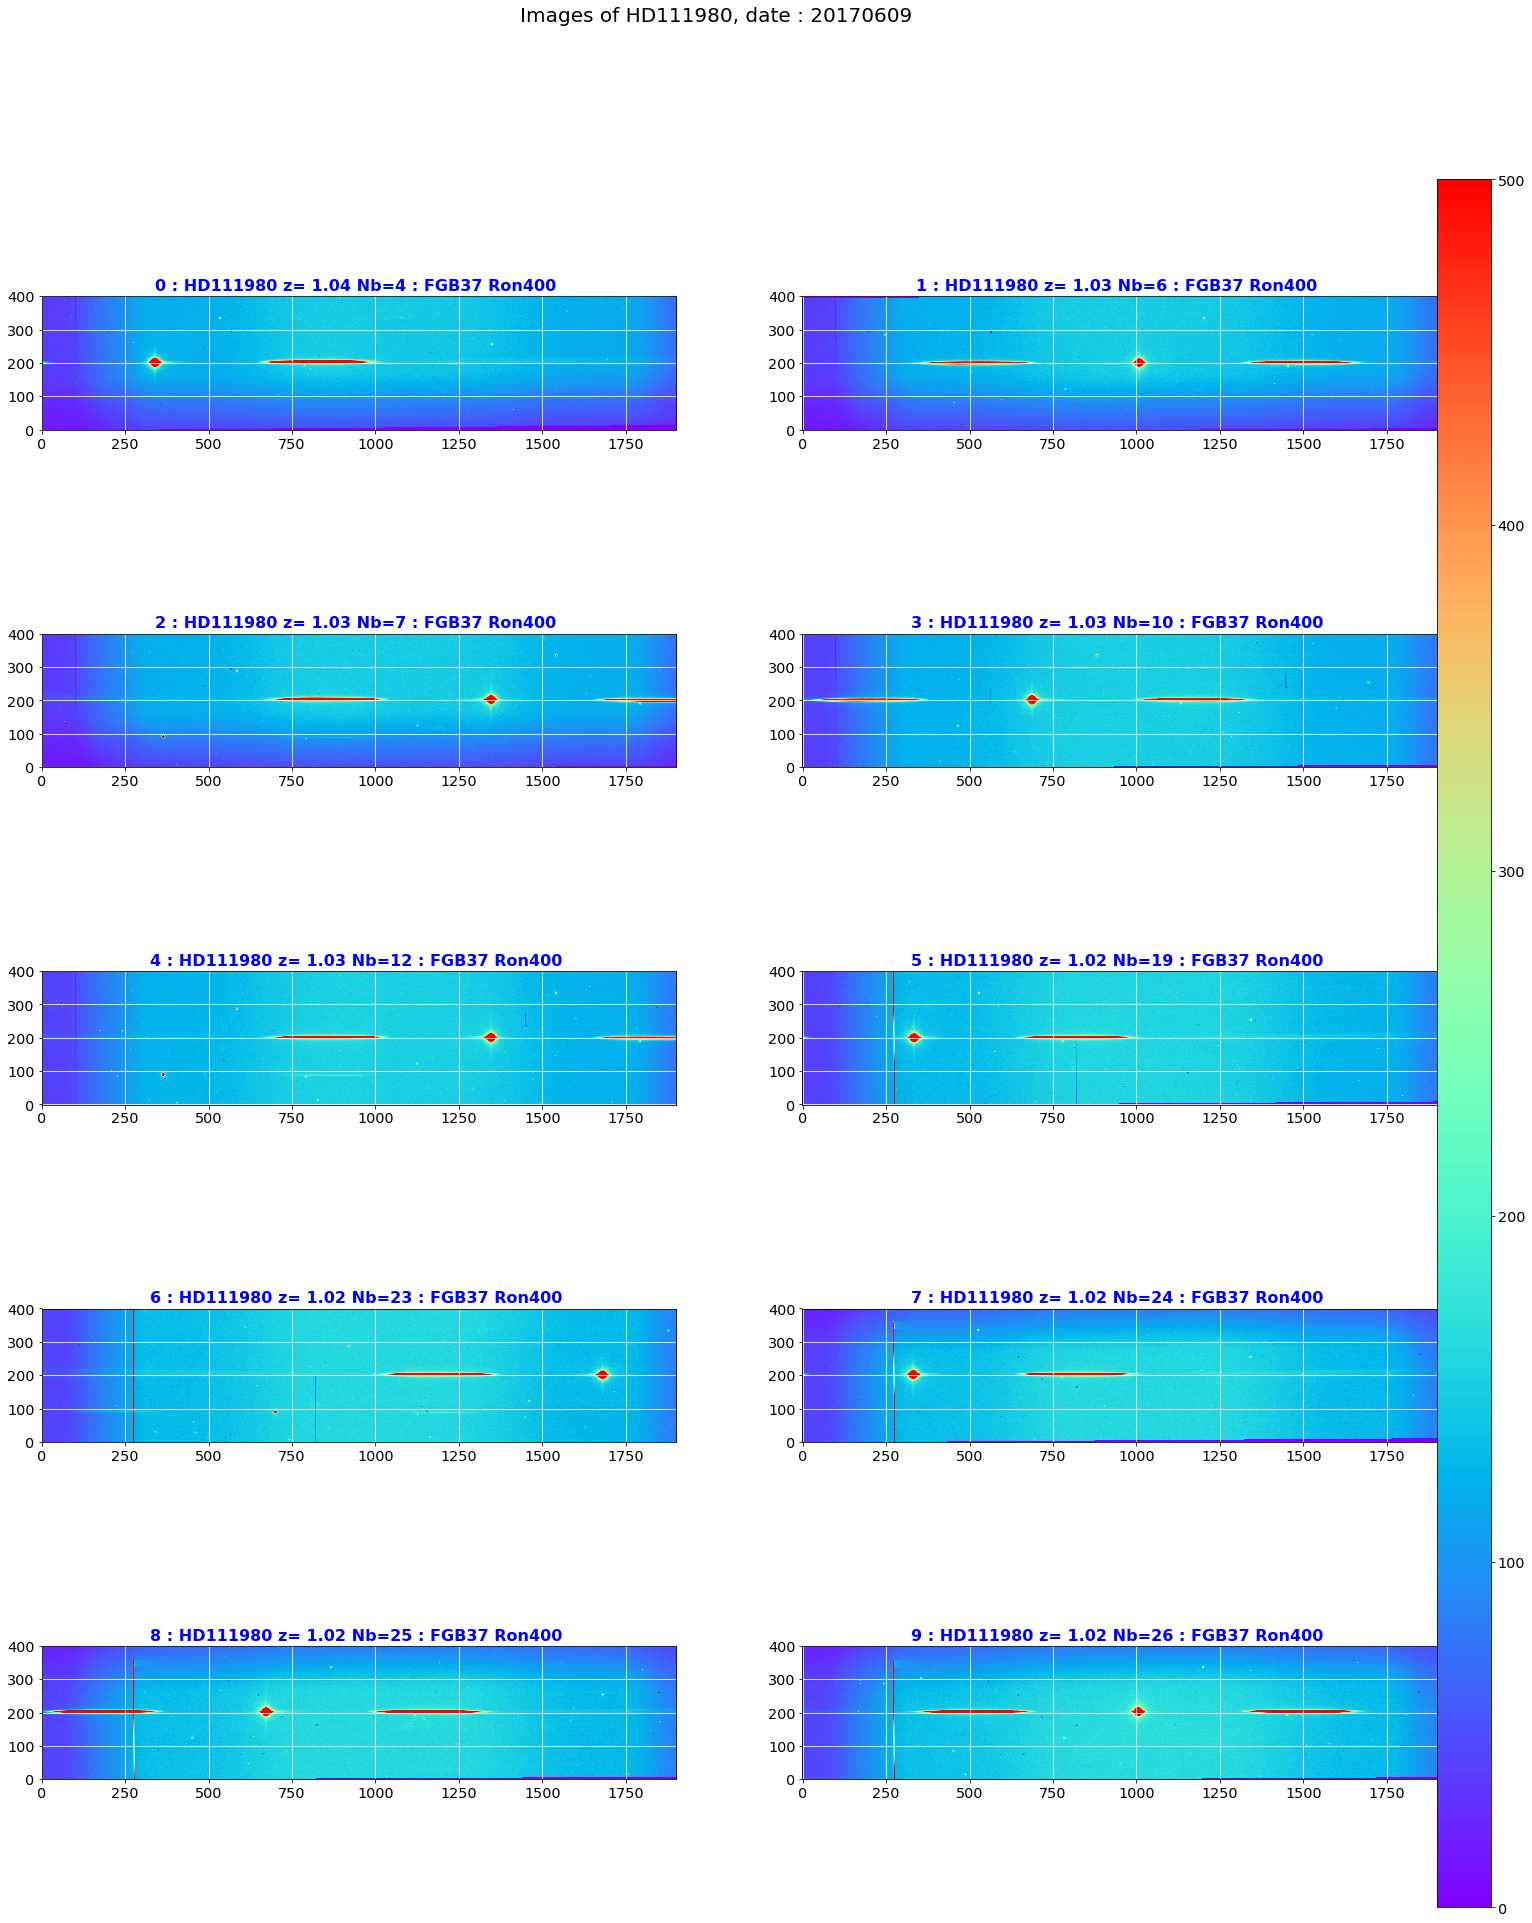

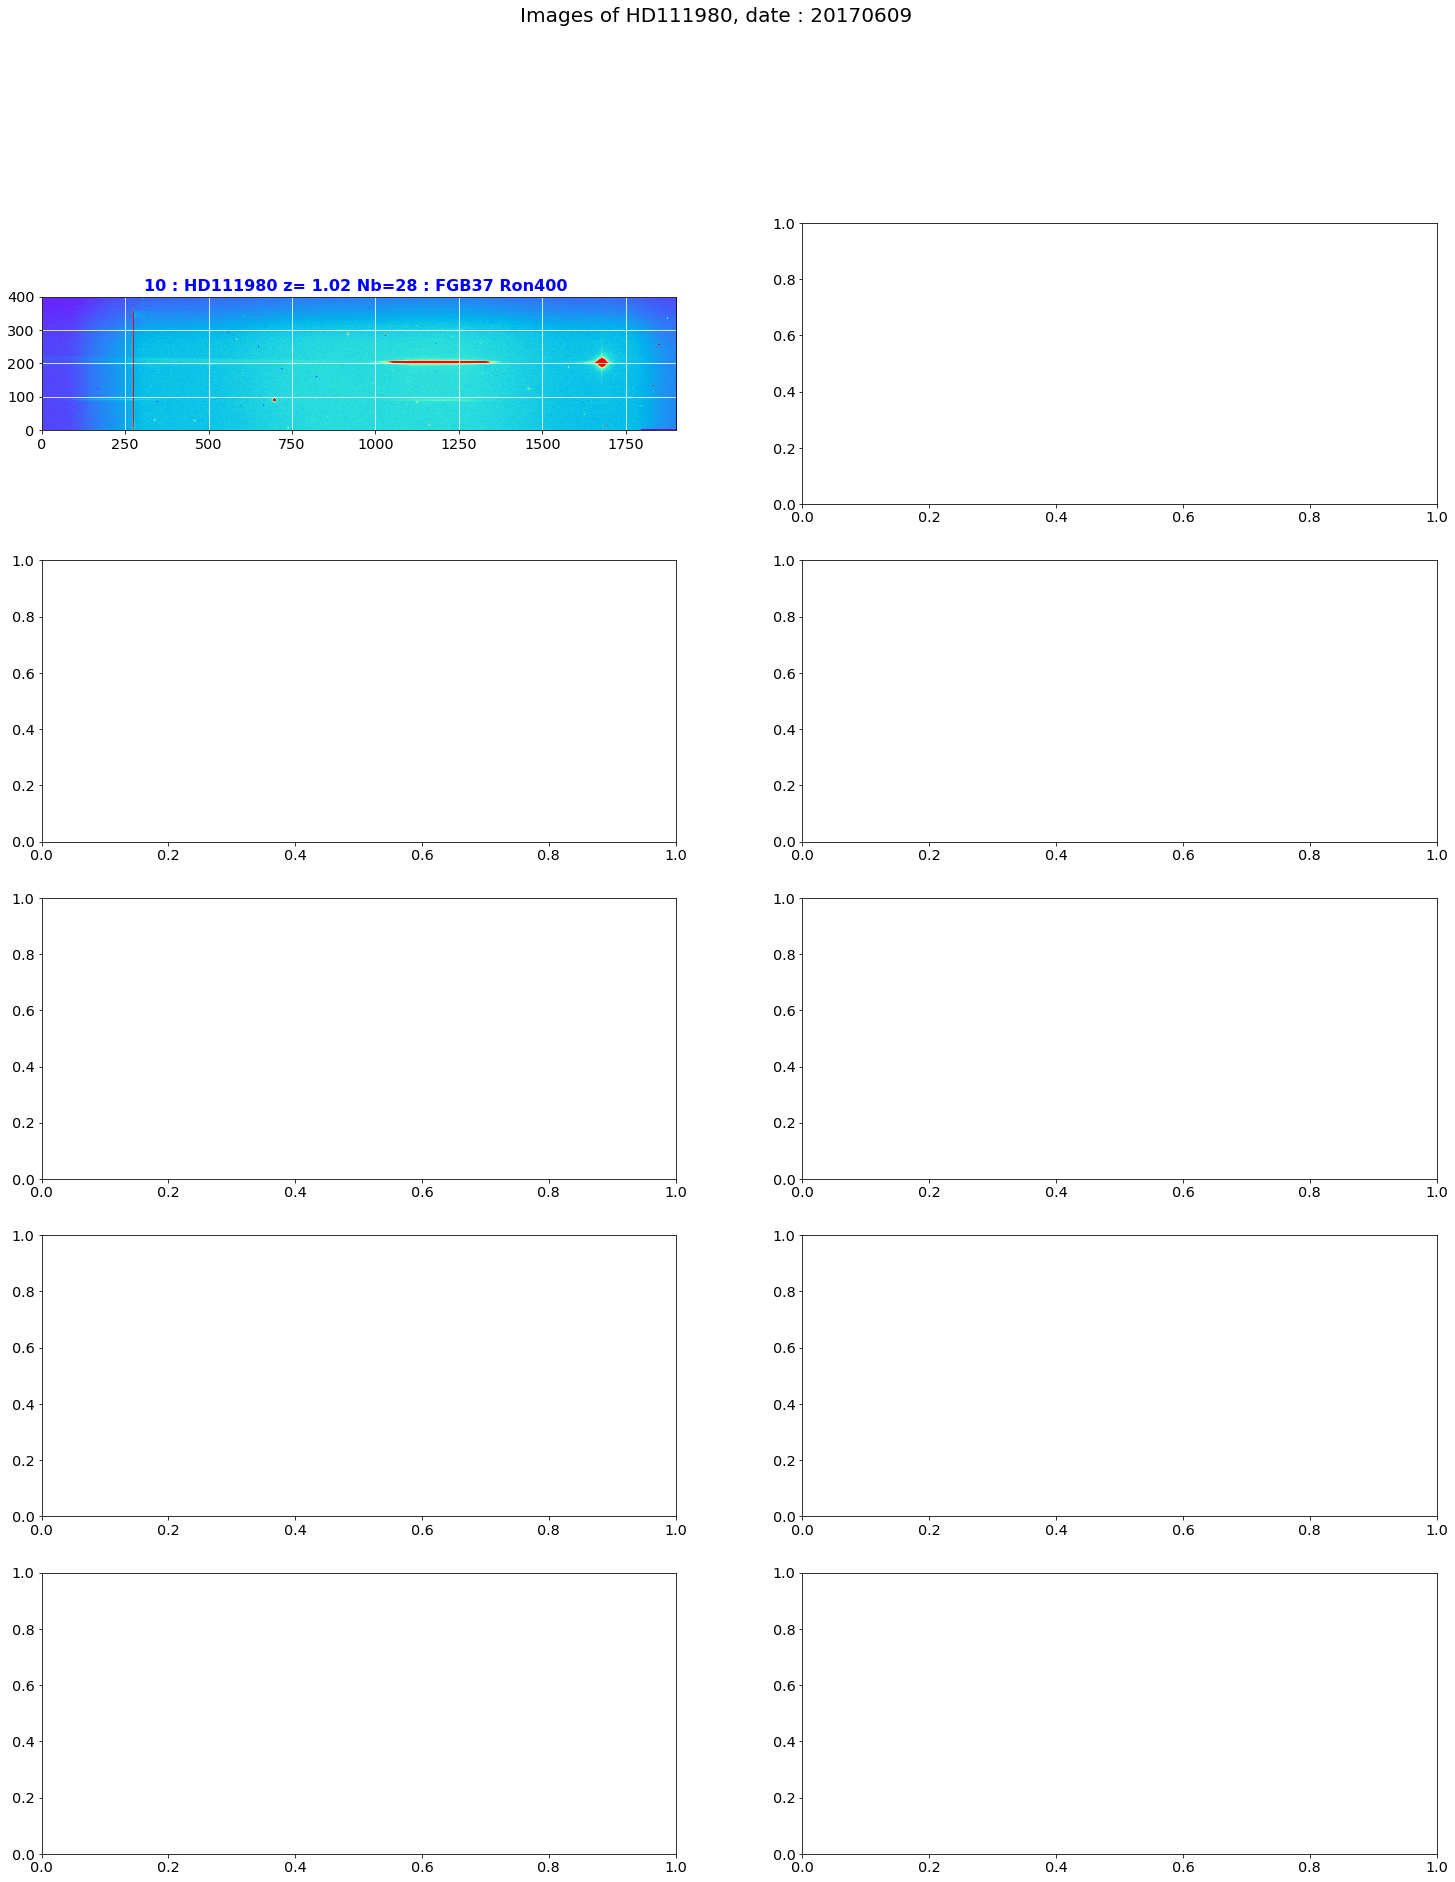

In [21]:
ShowImagesinPDF(all_images,all_titles,object_name,dir_top_images,all_filt,date,right_edge = 1900,NBIMGPERROW=2,vmin=0,vmax=500)

## Center of central star

Obviously the previous estimation of the center is wrong

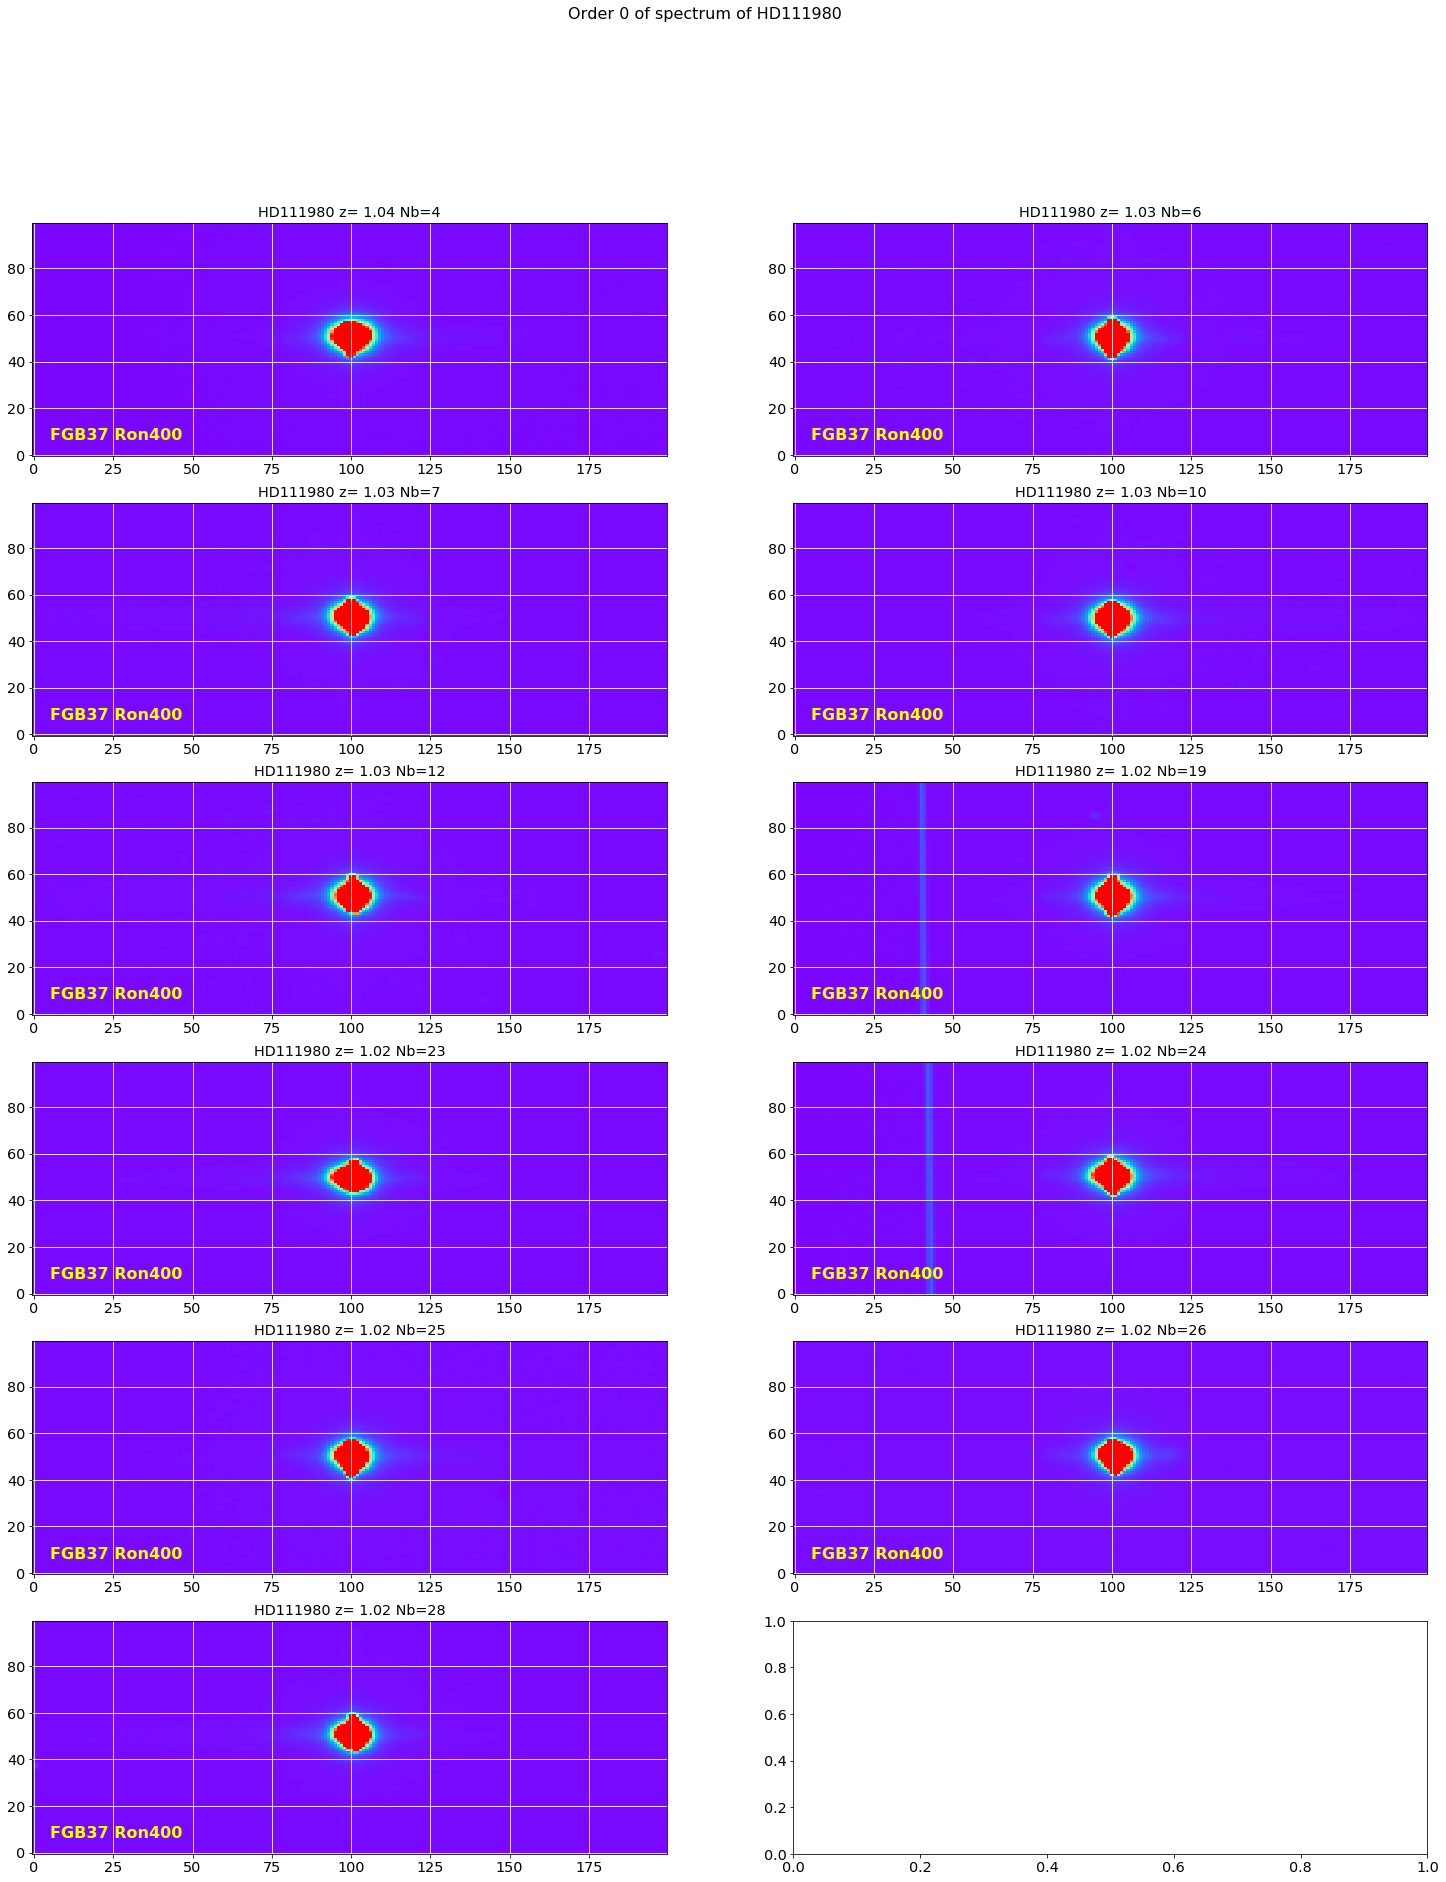

In [22]:
# Center : Order 0
#-------------------
# start at star
y_star0=[all_images[0].shape[0]/2]*len(all_images)
x_star0=x_star2
#ShowCenterImages([1300]*len(all_images),y_star0,[500]*len(all_images),[25]*len(all_images),
#                all_images,all_titles,all_filt,object_name,NBIMGPERROW=2,vmin=0,vmax=10000)
ShowCenterImages(x_star0,y_star0,[100]*len(all_images),[50]*len(all_images),
                 all_images,all_titles,all_filt,object_name,NBIMGPERROW=2,vmin=0,vmax=10000)

title='Order 0 of spectrum of {} '.format(object_name)
plt.suptitle(title,size=16)
figfilename=os.path.join(dir_top_images,'order0.pdf')
plt.savefig(figfilename)  

### check weighted_avg_and_std is a good estimator of the central position

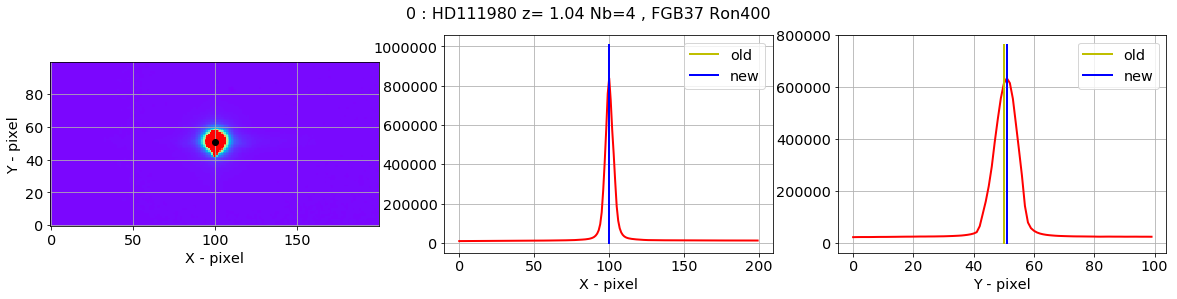

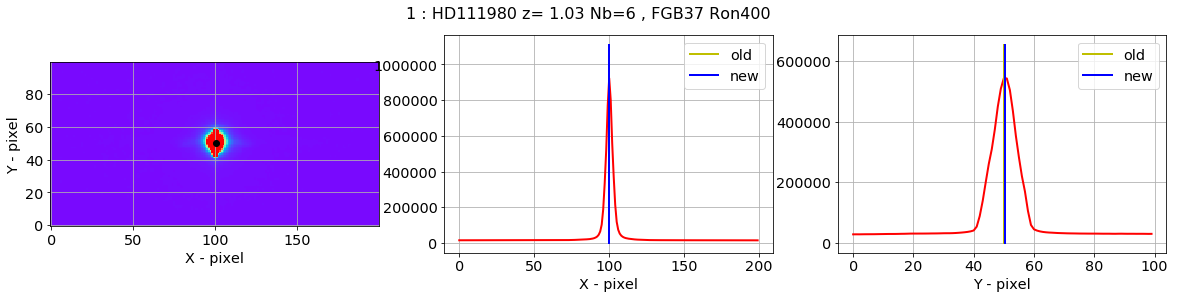

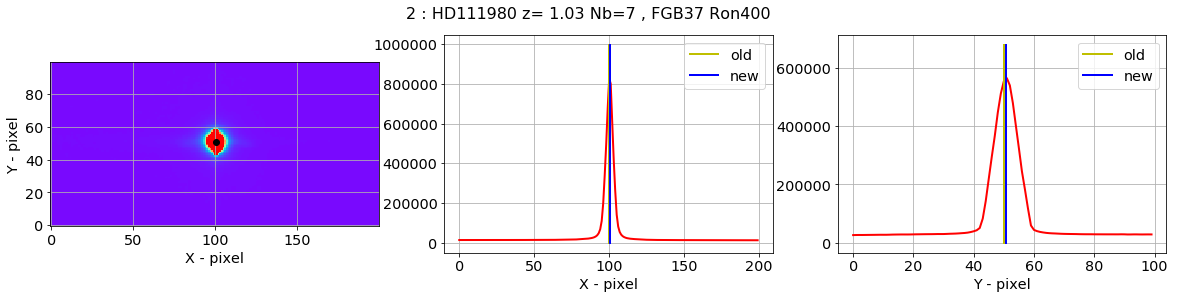

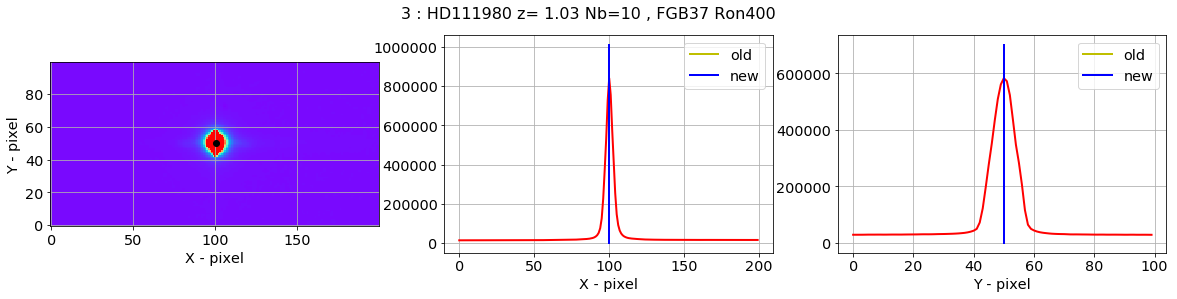

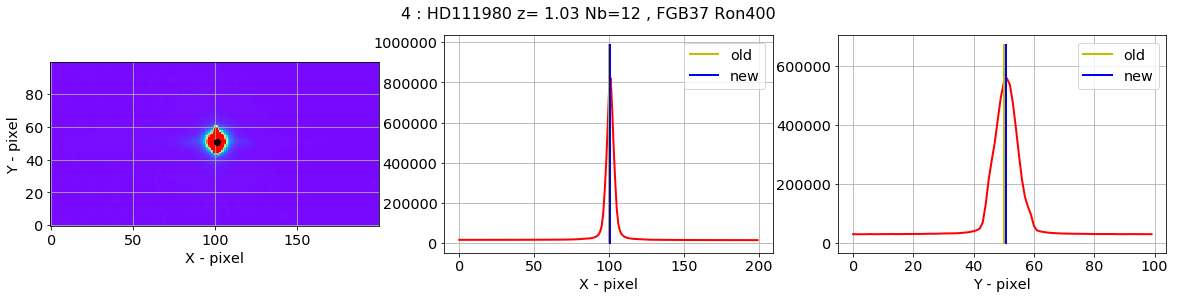

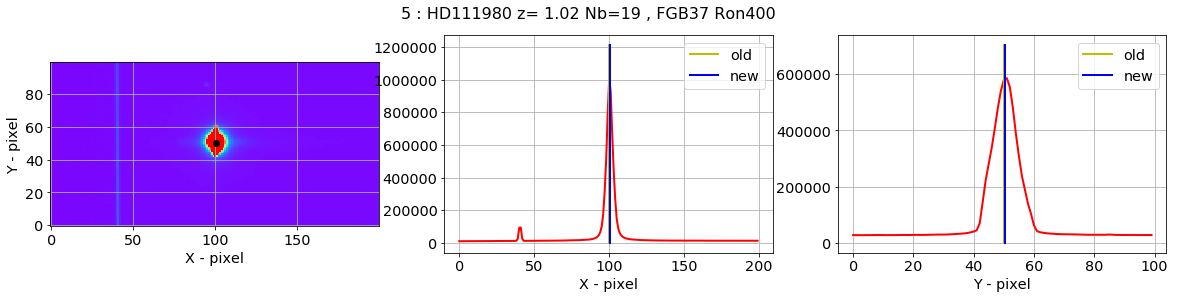

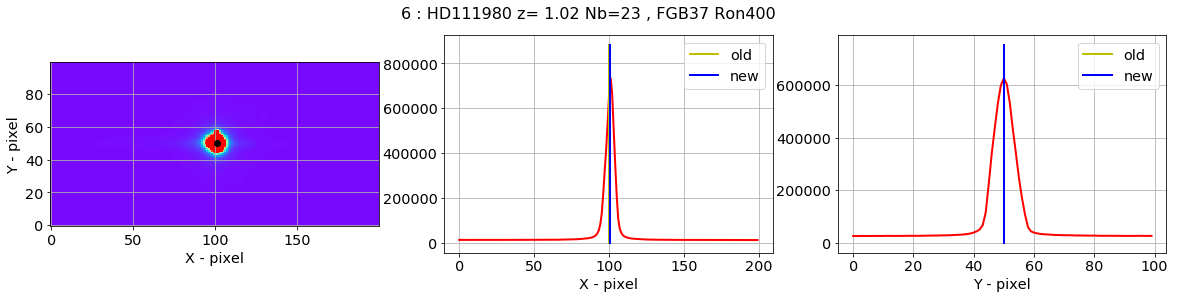

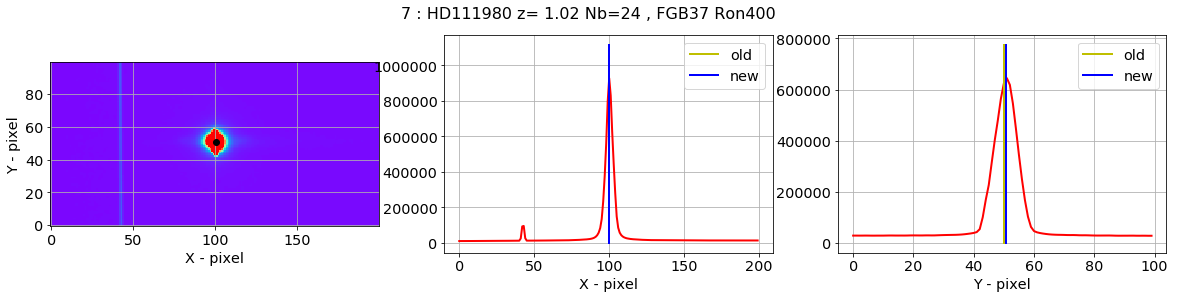

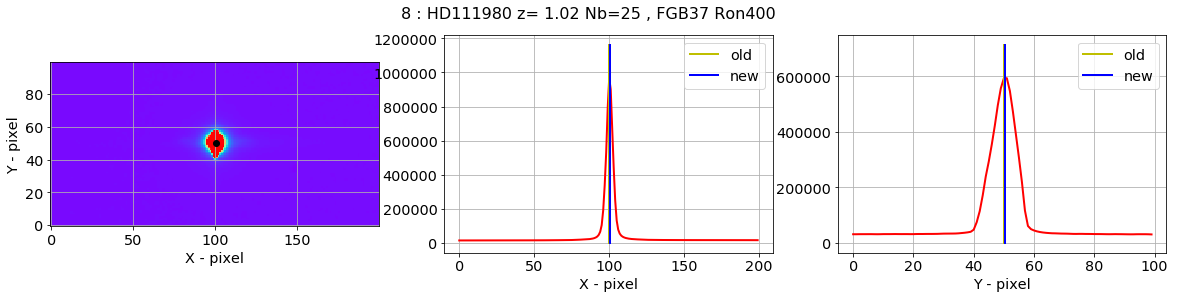

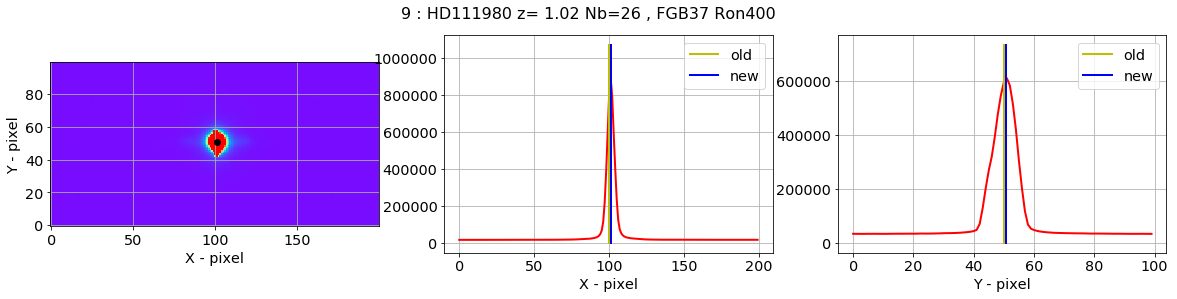

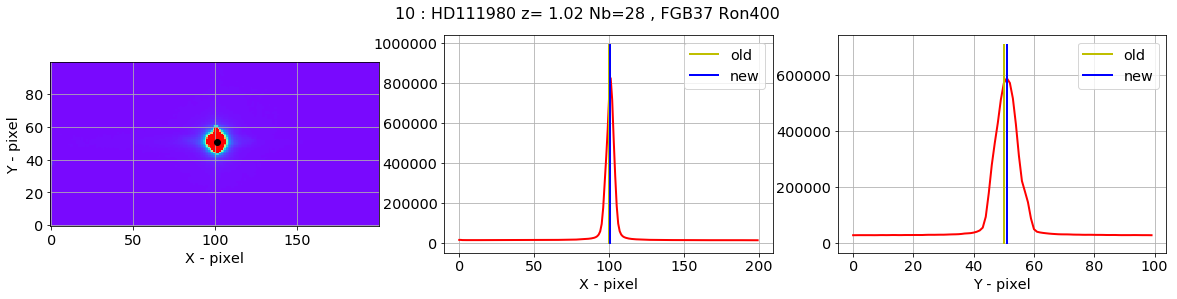

In [23]:
new_x_star,new_y_star=check_central_star(all_images,x_star2,y_star0,all_titles,all_filt)

## Zoom on the rotated image

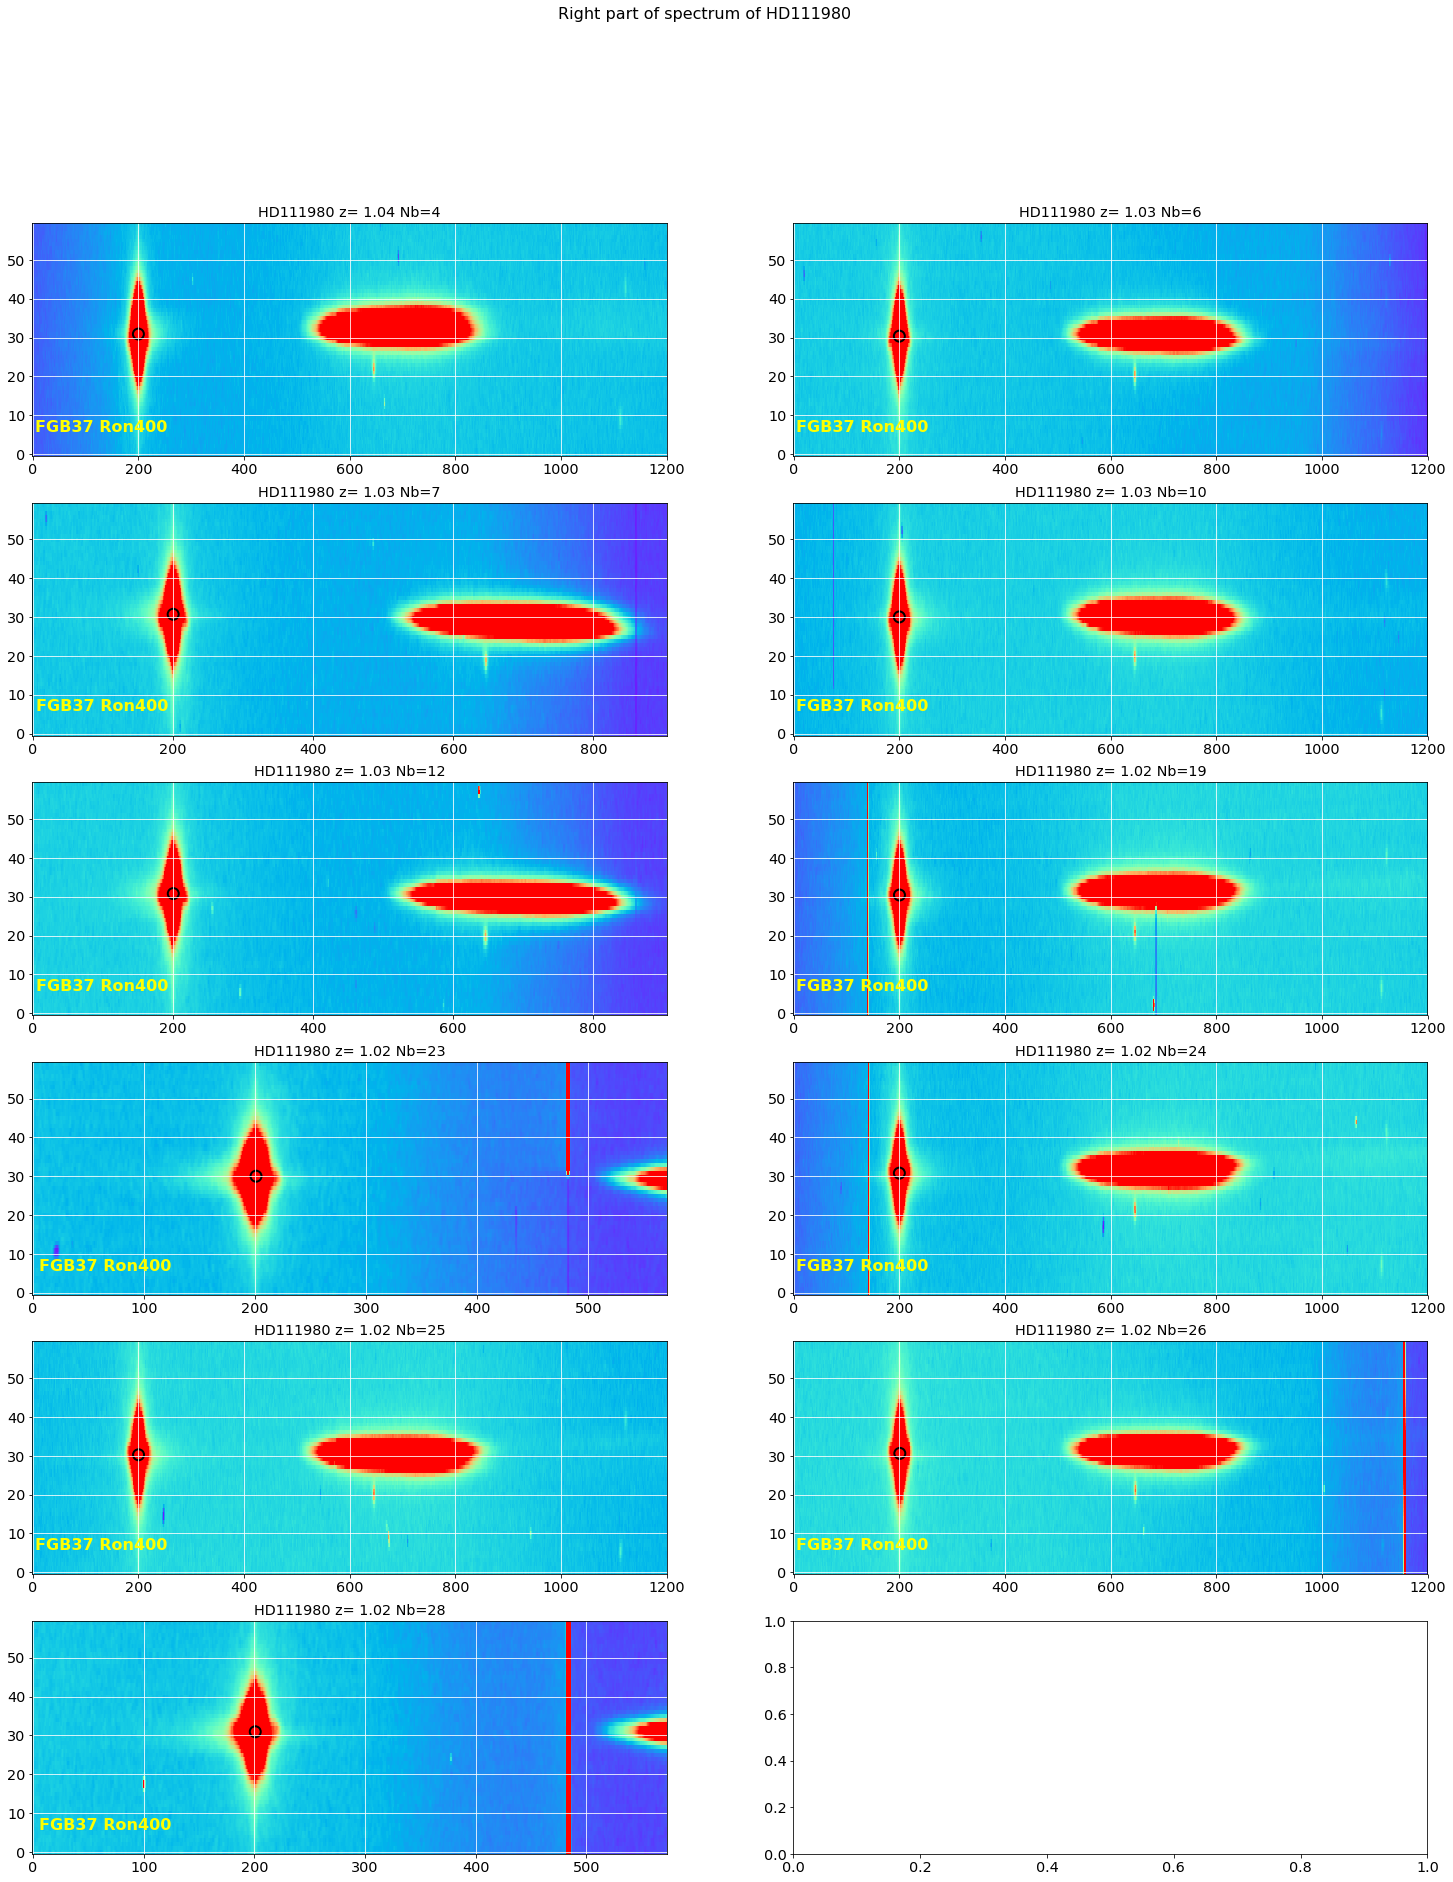

In [24]:
# Right spectrum
#---------------
# start at star
#y_star0=[all_images[0].shape[0]/2]*len(all_images)
#x_star0=x_star

y_star0=new_y_star
x_star0=new_x_star
#ShowCenterImages([1300]*len(all_images),y_star0,[500]*len(all_images),[25]*len(all_images),
#                all_images,all_titles,all_filt,object_name,NBIMGPERROW=2,vmin=0,vmax=10000)
ShowCenterImages(x_star0+400,y_star0,[600]*len(all_images),[30]*len(all_images),
                 all_images,all_titles,all_filt,object_name,NBIMGPERROW=2,vmin=0,vmax=500,target_pos=np.array([new_x_star,new_y_star]).T)

title='Right part of spectrum of {} '.format(object_name)
plt.suptitle(title,size=16)
figfilename=os.path.join(dir_top_images,'rightorder.pdf')
plt.savefig(figfilename)  

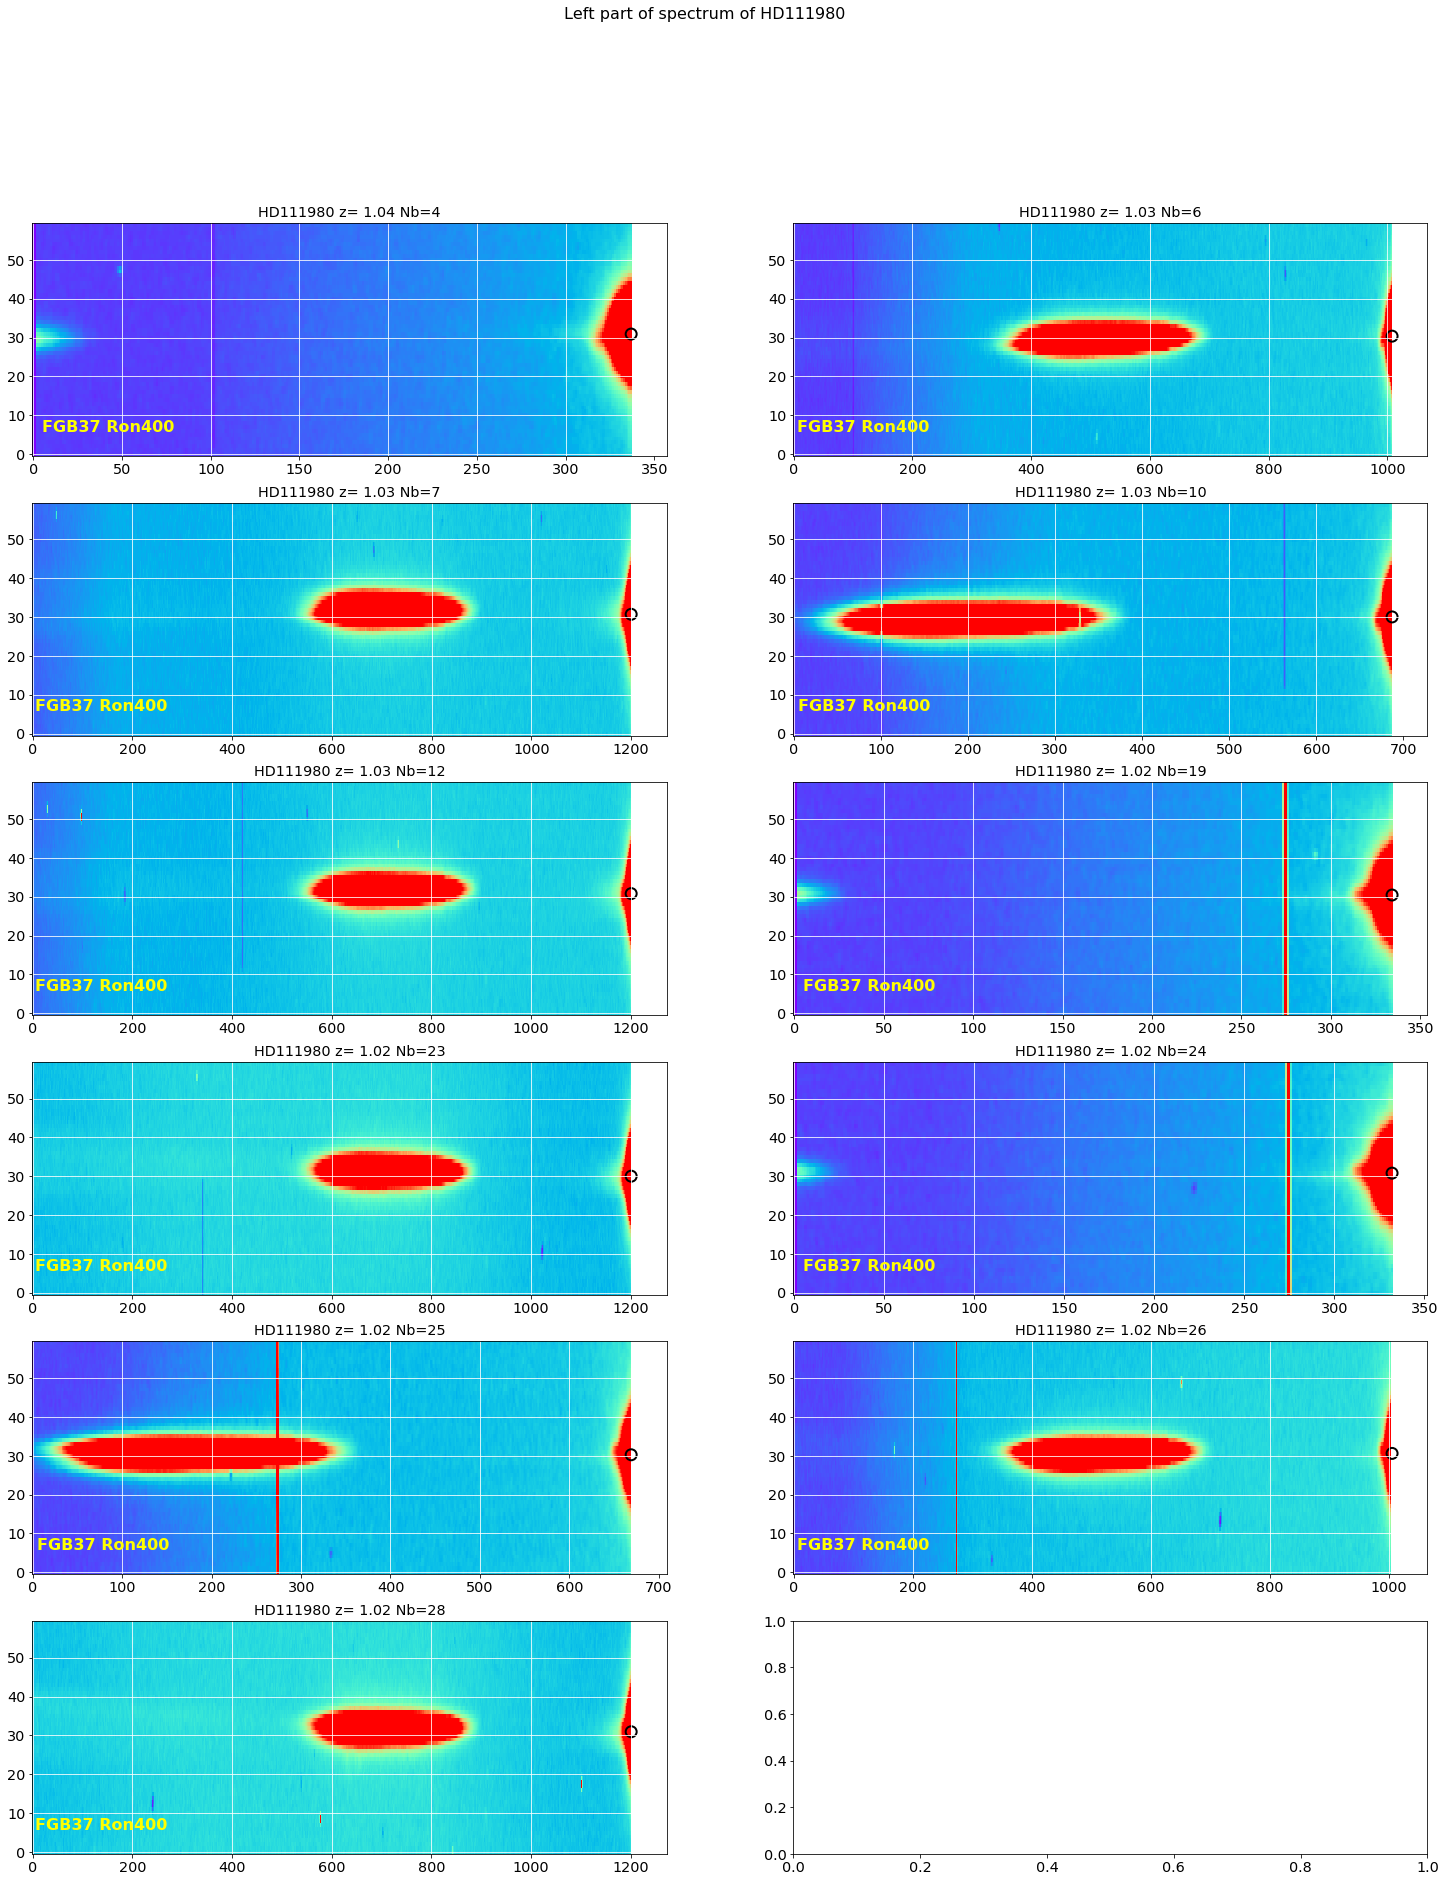

In [25]:
# Left spectrum
#--------------
#y_star0=[all_images[0].shape[0]/2]*len(all_images)
#x_star0=x_star-600

y_star0=new_y_star
x_star0=new_x_star

#ShowCenterImages([110]*len(all_images),[60]*len(all_images),[500]*len(all_images),[30]*len(all_images),
#                 all_images,all_titles,all_filt,object_name,NBIMGPERROW=2,vmin=0,vmax=10000)
ShowCenterImages(x_star0-600,y_star0,[600]*len(all_images),[30]*len(all_images),
                 all_images,all_titles,all_filt,object_name,NBIMGPERROW=2,vmin=0,vmax=500,target_pos=np.array([new_x_star,new_y_star]).T)
title='Left part of spectrum of {} '.format(object_name)
plt.suptitle(title,size=16)
figfilename=os.path.join(dir_top_images,'leftorder.pdf')
plt.savefig(figfilename)  


# Main emission/absorption lines in nm


In [26]:
for line in LINES:
    print line['label'],' \t lambda =' ,line['lambda']

$H\delta$  	 lambda = 410.2
$H\gamma$  	 lambda = 434.0
$He_{II}$  	 lambda = 468.6
$H\beta$  	 lambda = 486.3
$O_{III}$  	 lambda = 500.7
$C_{III}$  	 lambda = 570.0
$He_{I}$  	 lambda = 587.5
$H\alpha$  	 lambda = 656.3
$C_{III}$  	 lambda = 673.0
$C_{II}$  	 lambda = 679.0
$C_{IV}$  	 lambda = 706.0
$C_{II}$  	 lambda = 711.0
$C_{II}$  	 lambda = 723.5
$O_2$  	 lambda = 763.2
$H_2 O$  	 lambda = 970


# Plot one contour

Load hologram Ron400:
Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -0.3 degrees
Hologram center at x0 = 741.0 and y0 = 741.0 with average tilt of -0.3 degrees
Order  0 position at x0 = 435.0 and y0 = 742.5
Order +1 position at x0 = 1047.0 and y0 = 739.5
Distance between the orders: 611.97 pixels (14.69 mm)


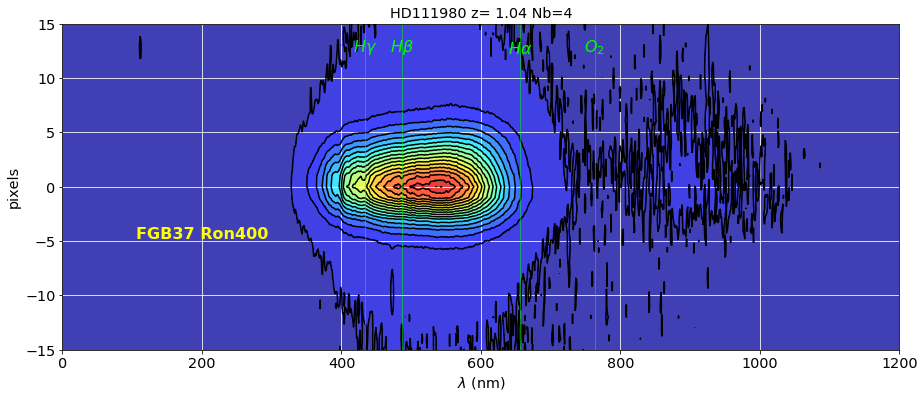

In [27]:
sel=0
ShowOneContour(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt,'contour_ron400_1.pdf')

Load hologram Ron400:
Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -0.3 degrees
Hologram center at x0 = 741.0 and y0 = 741.0 with average tilt of -0.3 degrees
Order  0 position at x0 = 435.0 and y0 = 742.5
Order +1 position at x0 = 1047.0 and y0 = 739.5
Distance between the orders: 611.97 pixels (14.69 mm)


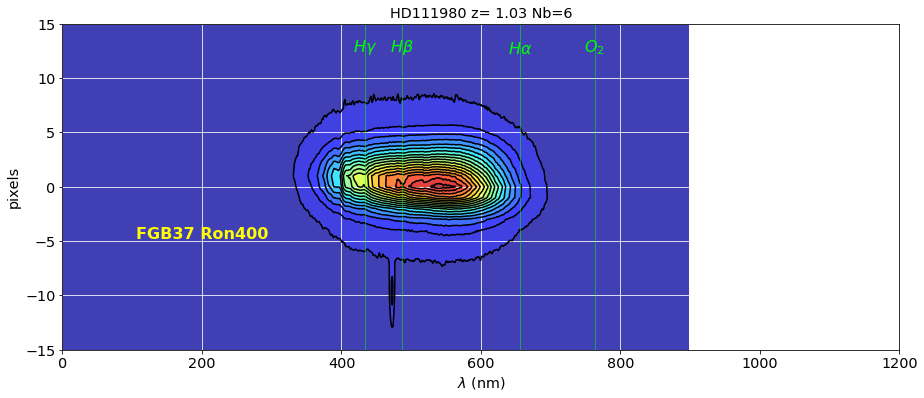

In [28]:
sel=1
ShowOneContour(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt,'contour_thor300_1.pdf')

Load hologram Ron400:
Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -0.3 degrees
Hologram center at x0 = 741.0 and y0 = 741.0 with average tilt of -0.3 degrees
Order  0 position at x0 = 435.0 and y0 = 742.5
Order +1 position at x0 = 1047.0 and y0 = 739.5
Distance between the orders: 611.97 pixels (14.69 mm)


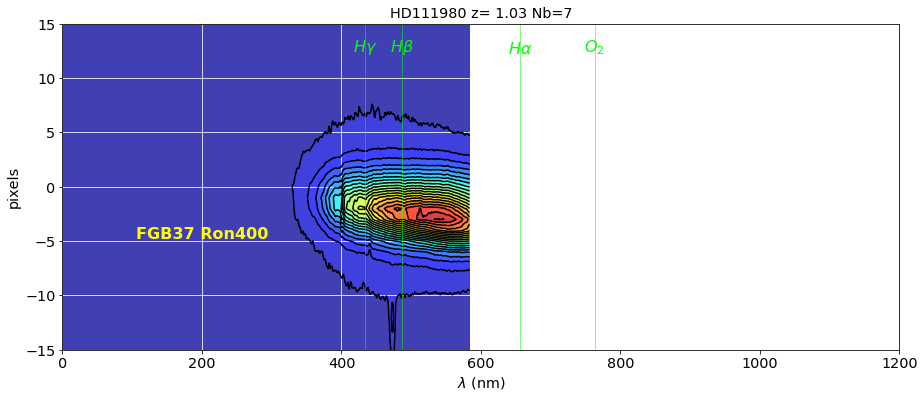

In [29]:
sel=2
ShowOneContour(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt,'contour_holophp_1.pdf')

Load hologram Ron400:
Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -0.3 degrees
Hologram center at x0 = 741.0 and y0 = 741.0 with average tilt of -0.3 degrees
Order  0 position at x0 = 435.0 and y0 = 742.5
Order +1 position at x0 = 1047.0 and y0 = 739.5
Distance between the orders: 611.97 pixels (14.69 mm)


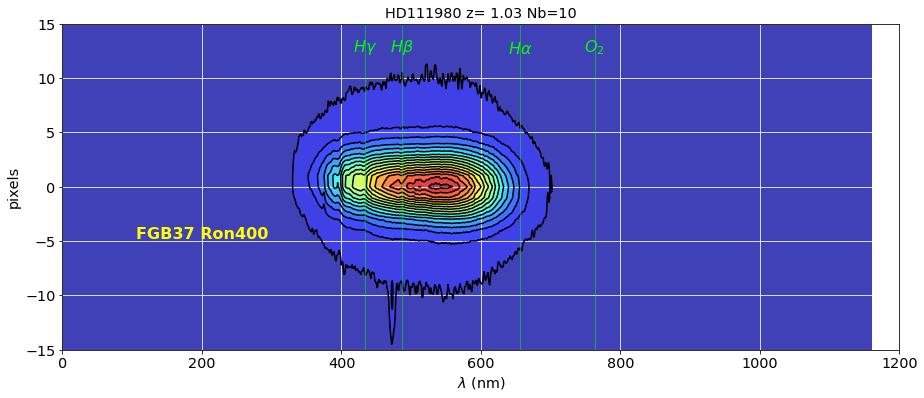

In [30]:
sel=3
ShowOneContour(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt,'contour_holophag_1.pdf')

Load hologram Ron400:
Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -0.3 degrees
Hologram center at x0 = 741.0 and y0 = 741.0 with average tilt of -0.3 degrees
Order  0 position at x0 = 435.0 and y0 = 742.5
Order +1 position at x0 = 1047.0 and y0 = 739.5
Distance between the orders: 611.97 pixels (14.69 mm)


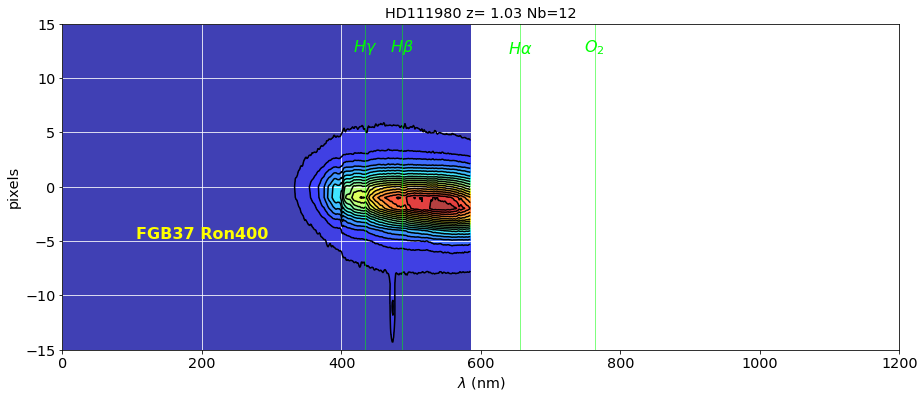

In [31]:
sel=4
ShowOneContour(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt,'contour_holoamag_1.pdf')

pdf Page written  1
Final pdf Page written  1


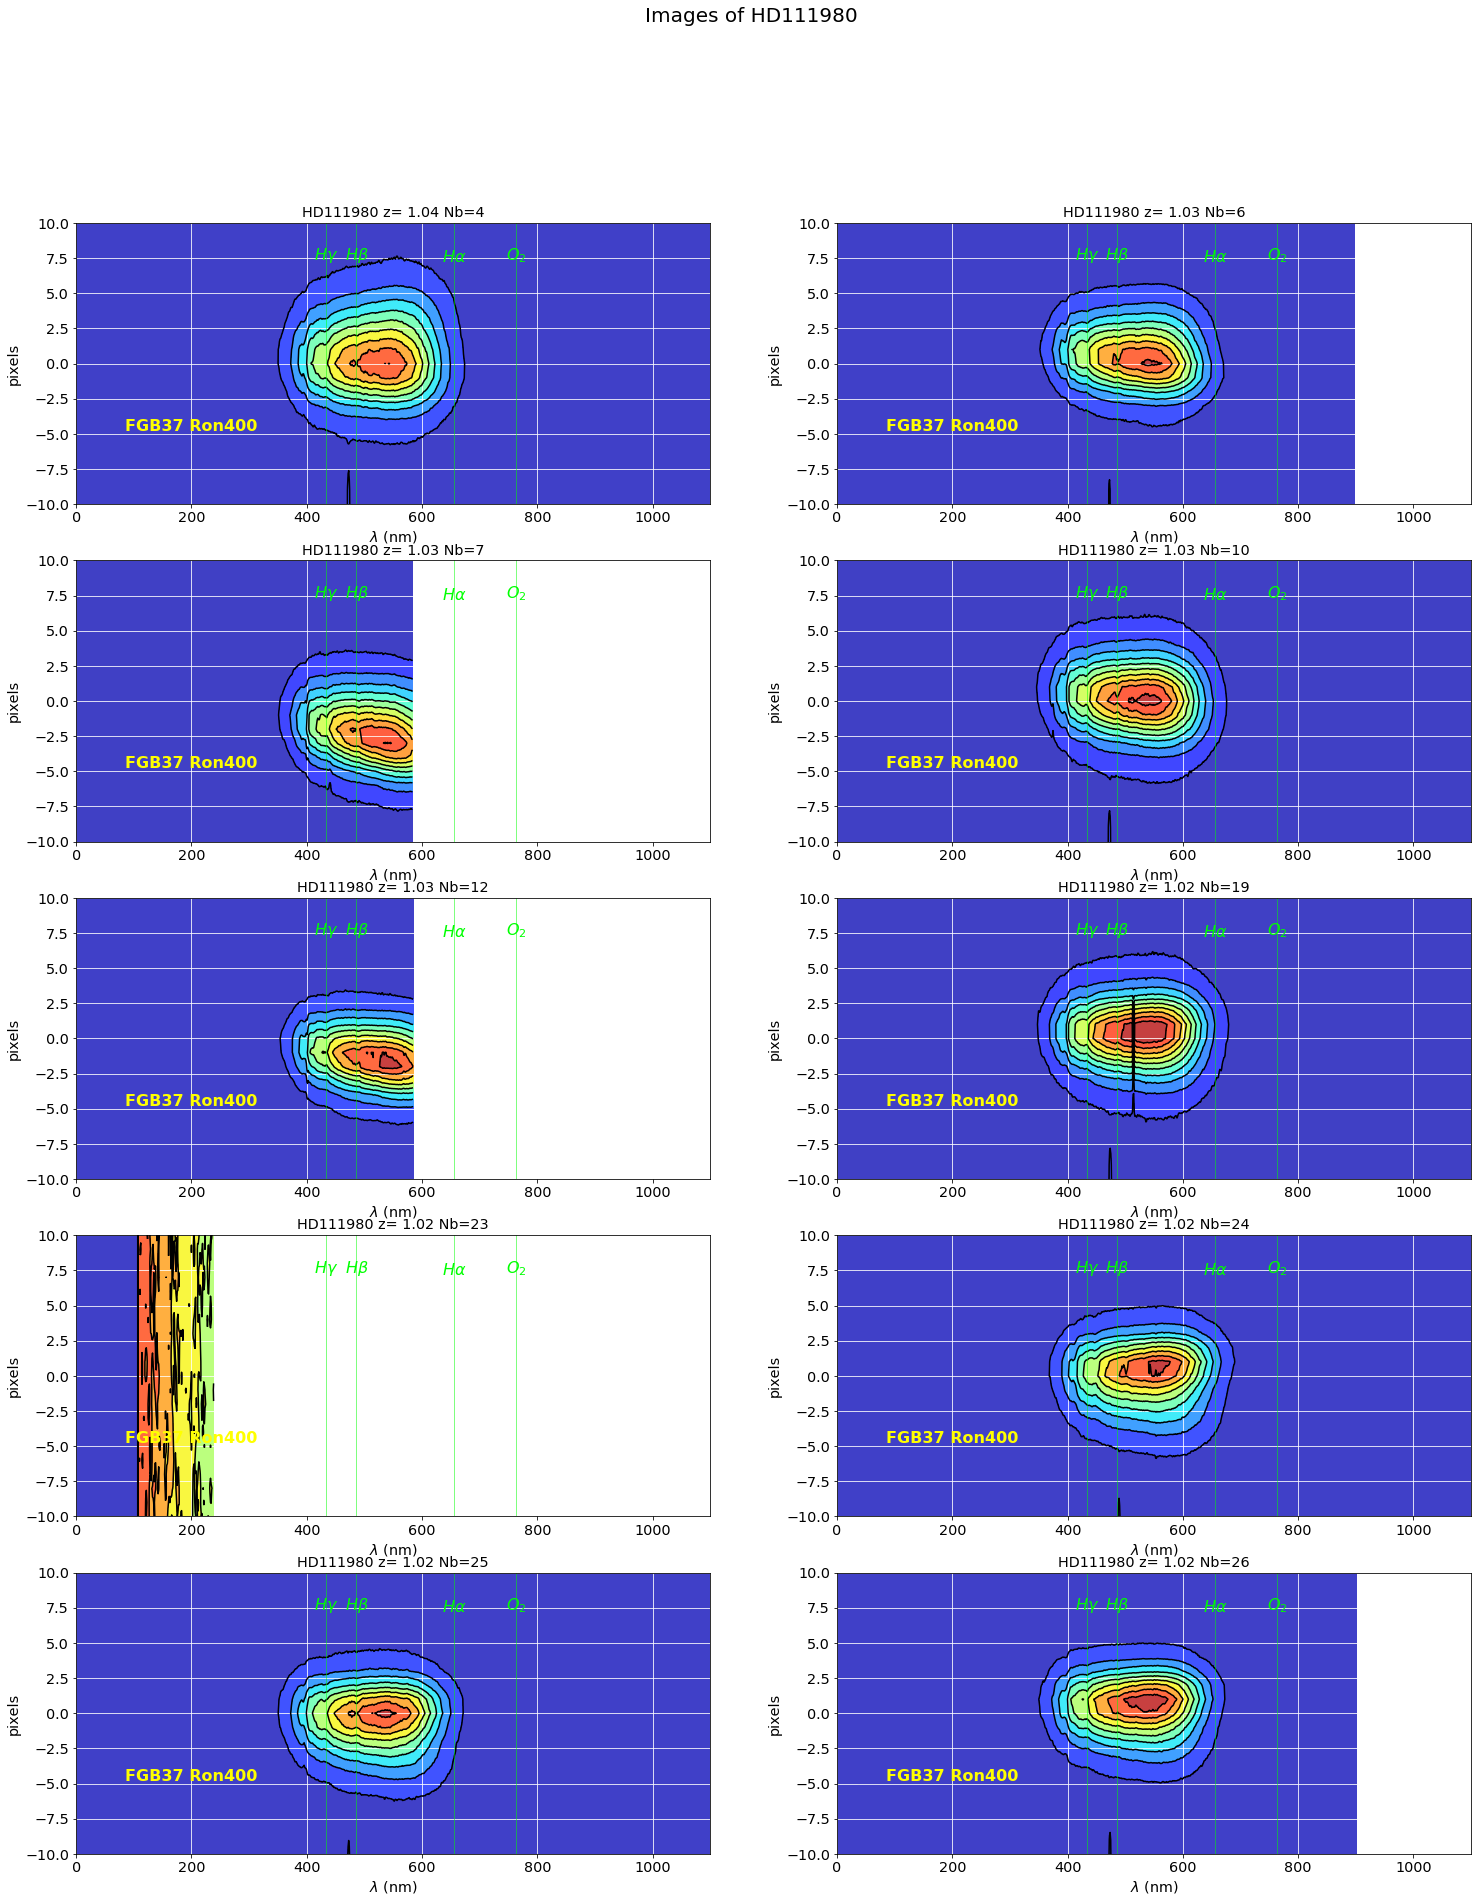

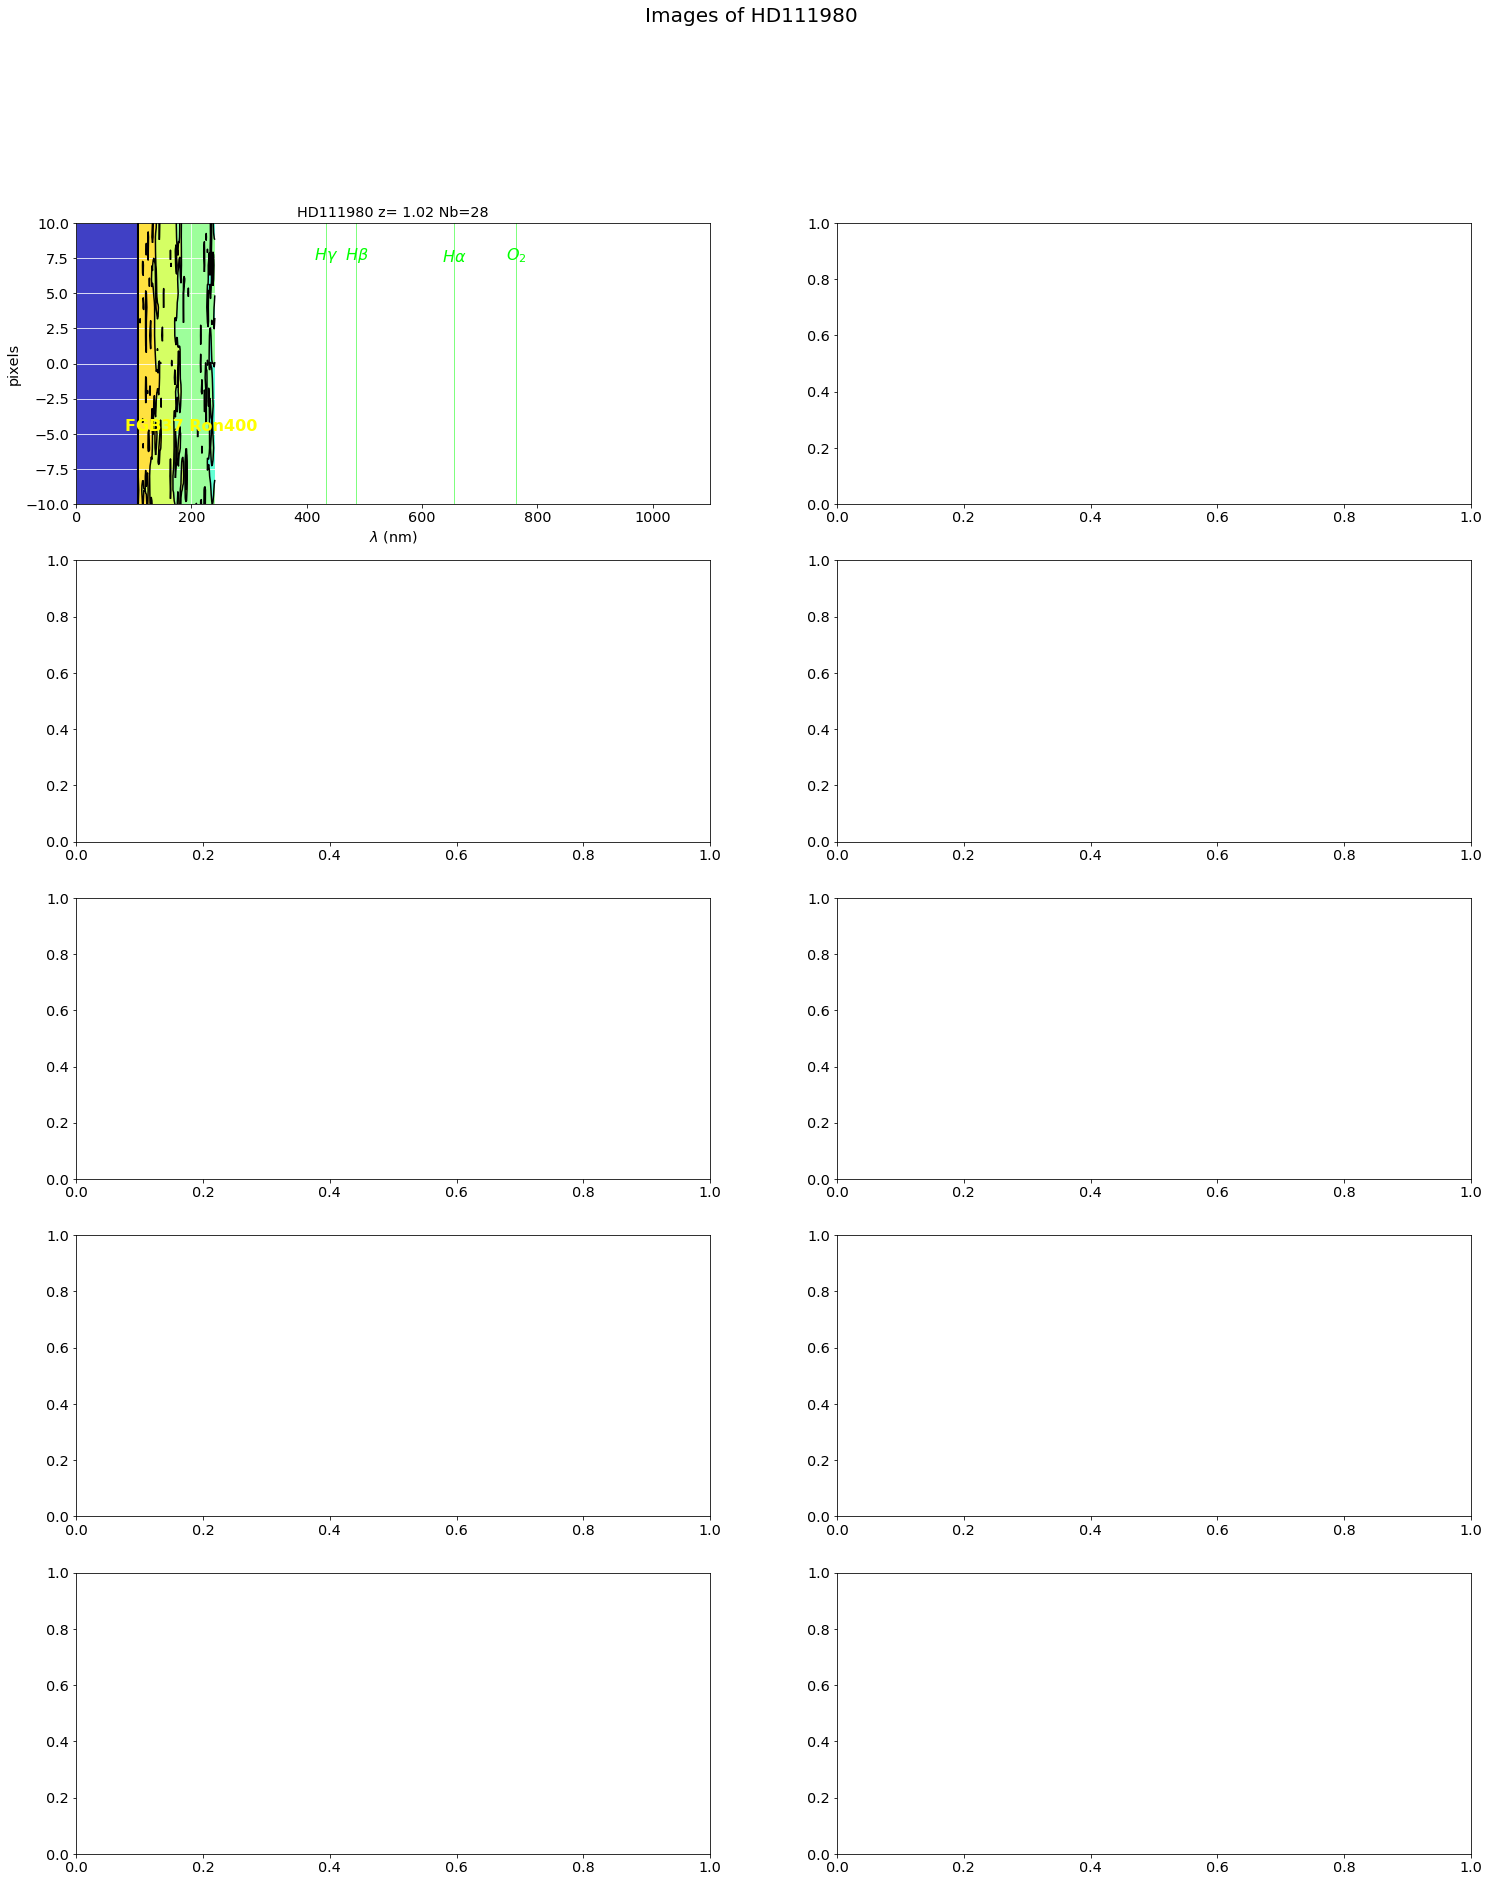

In [32]:
ShowOneOrder_contour(all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt,'firstorderright_contour.pdf')

## Test which transverse spectrum

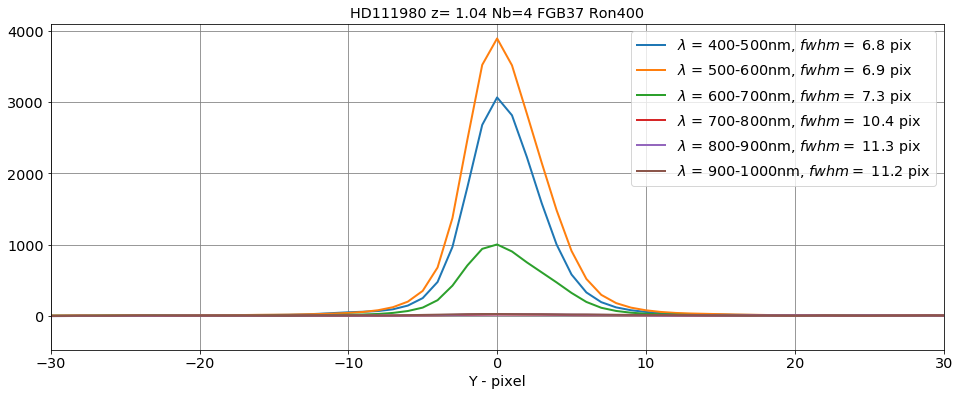

In [37]:
sel=0
w0,fwhm0=ShowManyTransverseSpectrum(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt,'transverse_Ron400.pdf')

In [35]:
#sel=1
#w2,fwhm2=ShowManyTransverseSpectrum(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt,'transverse_holophp.pdf')

In [38]:
#sel=2
#w3,fwhm3=ShowManyTransverseSpectrum(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt,'transverse_holophag.pdf')

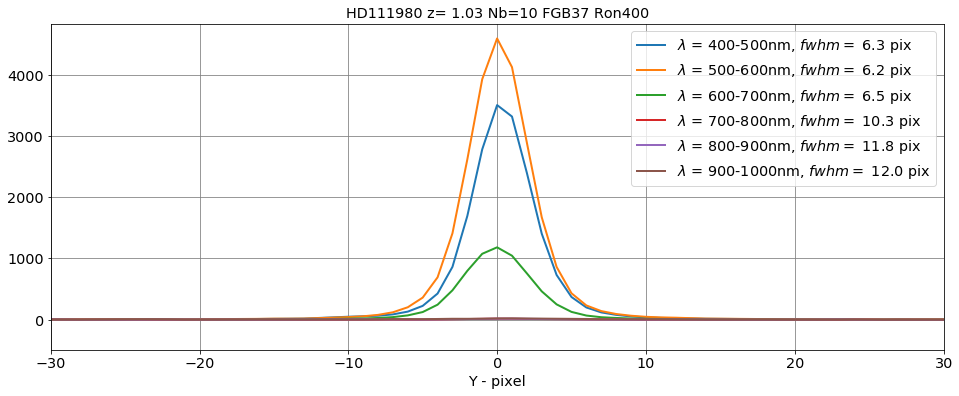

In [40]:
sel=3
w4,fwhm4=ShowManyTransverseSpectrum(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt,'transverse_Ron400_2.pdf')

## Summary on fwhm 

In [42]:
FWHFFlag=False
if FWHFFlag:
    plt.figure(figsize=(6,6))
    NBINS=w0.shape[0]
    plt.plot(w0,fwhm0,'-',label='Thor300',lw=3)
    #plt.plot(w1,fwhm1,'-',label='Ron400',lw=3)
    plt.plot(w2,fwhm2,'-',label='Holophp',lw=3)
    plt.plot(w3,fwhm3,'-',label='Holophag',lw=3)
    plt.plot(w4,fwhm4,'-',label='Holoamag',lw=3)
    plt.grid()
    plt.xlabel('$\lambda$ (nm)')
    plt.ylabel('fwhm (pixels)')
    plt.title('fwhm vs wavelength')
    plt.legend(loc=2)
    figname='fwhm_vs_lambdas_{}.pdf'.format(NBINS)
    figfilename=os.path.join(dir_top_images,figname)  
    #plt.ylim(0.,25.)
    plt.savefig(figfilename)

## Longitudinal spectrum versus transverse width

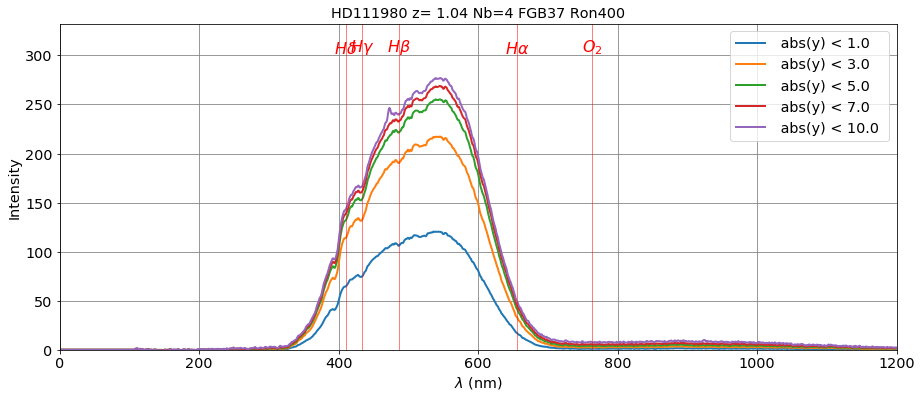

In [43]:
sel=0
ShowLongitudinalSpectraSelection(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt,'long_thor300_1.pdf')

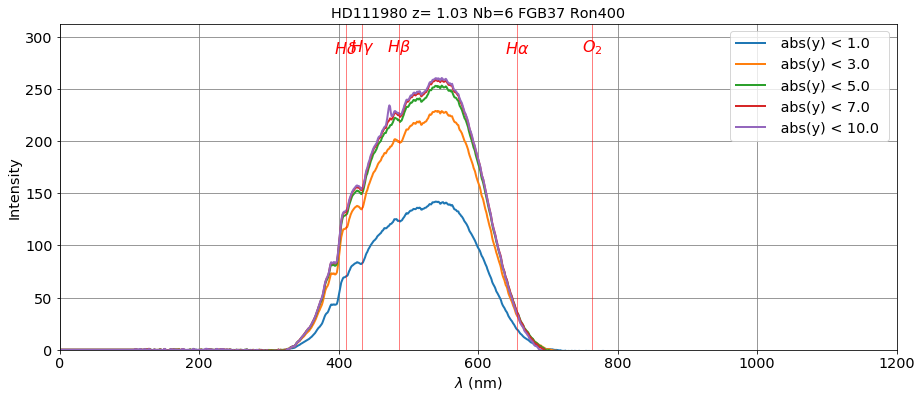

In [44]:
sel=1
ShowLongitudinalSpectraSelection(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt,'long_holophp_1.pdf')

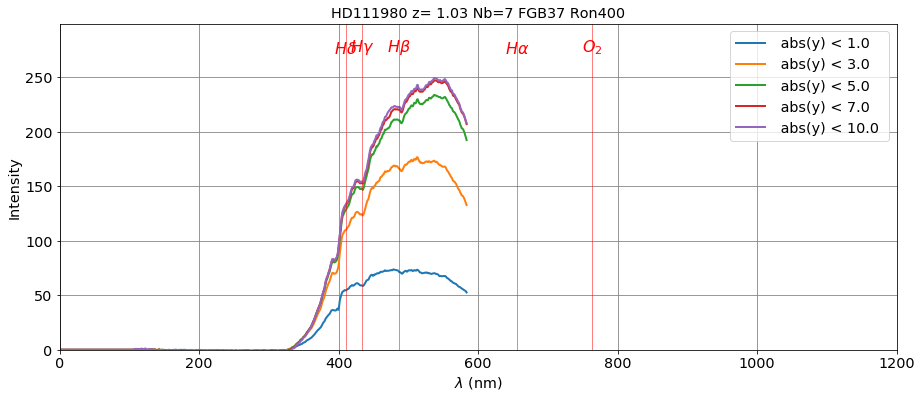

In [45]:
sel=2
ShowLongitudinalSpectraSelection(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt,'long_holophag_1.pdf')

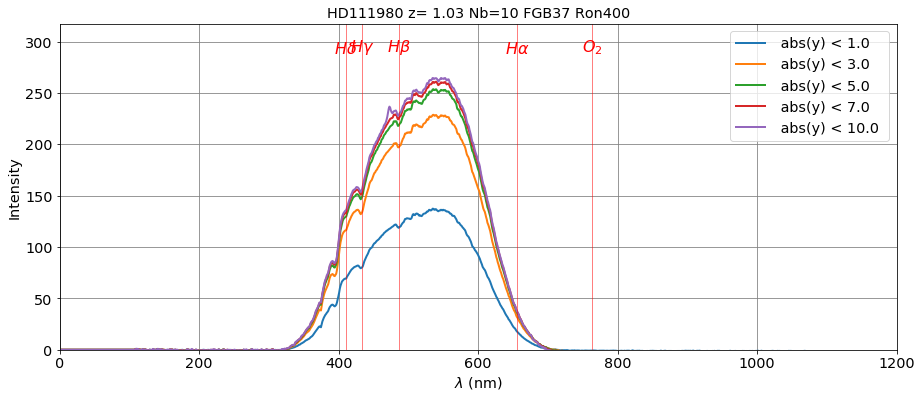

In [46]:
sel=3
ShowLongitudinalSpectraSelection(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt,'long_holoamag_1.pdf')

## Quality of O2

In [ ]:
sel=0
ShowOneAbsorptionLine(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt,'long_o2absline_thor300.pdf')

In [ ]:
sel=1
ShowOneAbsorptionLine(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt,'long_o2absline_holophag.pdf')

In [ ]:
sel=2
ShowOneAbsorptionLine(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt,'long_o2absline_holophag.pdf')

In [ ]:
sel=3
ShowOneAbsorptionLine(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt,'long_o2absline_holoamag.pdf')

# Equivalent width

In [ ]:
sel=0
ShowOneEquivWidth(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt,'long_eqwwidth_thor300_1.pdf')

In [ ]:
sel=1
ShowOneEquivWidth(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt,'long_eqwwidth_holophp.pdf')

In [ ]:
sel=2
ShowOneEquivWidth(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt,'long_eqwwidth_holophag.pdf')

In [ ]:
sel=3
ShowOneEquivWidth(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt,'long_eqwwidth_holoamag.pdf')

# Compute equivalent width and show absorption line

In [ ]:
sel=0
CalculateOneAbsorptionLine(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt,'calc_eqwwidth_thor300_1.pdf')

In [ ]:
sel=1
CalculateOneAbsorptionLine(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt,'calc_eqwwidth_php_1.pdf')

In [ ]:
sel=2
CalculateOneAbsorptionLine(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt,'calc_eqwwidth_phag_1.pdf')

In [ ]:
sel=3
CalculateOneAbsorptionLine(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt,'calc_eqwwidth_amag_1.pdf')

# Computation of equivalent width and show equivalent width

In [ ]:
sel=0
CalculateOneEquivWidth(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt,'calc_eqwwidth_thor300_1.pdf')

In [ ]:
sel=1
CalculateOneEquivWidth(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt,'calc_eqwwidth_holophp_1.pdf')

In [ ]:
sel=2
CalculateOneEquivWidth(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt,'calc_eqwwidth_holophag_1.pdf')

In [ ]:
sel=3
CalculateOneEquivWidth(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt,'calc_eqwwidth_holoamag_1.pdf')